In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv(r'C:\Users\Praveen Shahani\Desktop\Datasets\2021_OPM_FEVS_PRDF.csv')
## Checking if there is any duplicate values
df

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
0,112970976817,XX,5.0,5.0,5.0,5.0,5,4,4,4,...,A,B,B,B,B,A,A,A,A,2.209652
1,194868625278,XX,3.0,2.0,4.0,3.0,4,2,4,2,...,NaN,A,B,B,B,B,A,A,C,2.209652
2,152966380283,XX,5.0,5.0,4.0,4.0,3,4,5,4,...,B,B,B,B,A,B,A,B,C,1.858874
3,193041162980,XX,5.0,5.0,5.0,5.0,5,5,5,5,...,B,B,A,B,B,B,A,A,A,1.228573
4,146655962451,XX,4.0,5.0,5.0,4.0,4,3,5,4,...,B,B,B,B,B,B,A,A,A,1.735842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292515,154057939422,ST,3.0,4.0,4.0,3.0,4,4,2,4,...,B,B,B,A,A,A,B,B,A,3.004992
292516,151758964104,ST,3.0,4.0,2.0,4.0,2,2,3,3,...,B,B,B,A,A,A,B,B,D,4.427855
292517,143492802997,ST,3.0,3.0,NaN,4.0,4,4,4,3,...,NaN,NaN,NaN,NaN,NaN,A,A,NaN,A,4.202227
292518,110267537558,ST,2.0,4.0,5.0,5.0,2,1,5,4,...,B,B,B,A,A,A,B,B,C,3.523113


In [53]:
df.drop_duplicates() ##dropping all the duplicate values
print()
print(df.info())  ##checking the data types of every column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292520 entries, 0 to 292519
Data columns (total 79 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   RandomID  292520 non-null  int64  
 1   agency    292520 non-null  object 
 2   Q1        291074 non-null  float64
 3   Q2        288624 non-null  float64
 4   Q3        290112 non-null  float64
 5   Q4        291324 non-null  float64
 6   Q5        290770 non-null  object 
 7   Q6        286449 non-null  object 
 8   Q7        290240 non-null  object 
 9   Q8        291451 non-null  object 
 10  Q9        291910 non-null  float64
 11  Q10       292038 non-null  object 
 12  Q11       292018 non-null  object 
 13  Q12       291755 non-null  object 
 14  Q13       291920 non-null  object 
 15  Q14       291306 non-null  object 
 16  Q15       288257 non-null  object 
 17  Q16       290367 non-null  object 
 18  Q17       290268 non-null  object 
 19  Q18       291274 non-null  object 
 20  Q19

In [54]:
df.Q11.value_counts()

2    98762
X    72324
5    53853
1    41320
3    19878
4     5881
Name: Q11, dtype: int64

In [55]:
df.head()

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
0,112970976817,XX,5.0,5.0,5.0,5.0,5,4,4,4,...,A,B,B,B,B,A,A,A,A,2.209652
1,194868625278,XX,3.0,2.0,4.0,3.0,4,2,4,2,...,NaN,A,B,B,B,B,A,A,C,2.209652
2,152966380283,XX,5.0,5.0,4.0,4.0,3,4,5,4,...,B,B,B,B,A,B,A,B,C,1.858874
3,193041162980,XX,5.0,5.0,5.0,5.0,5,5,5,5,...,B,B,A,B,B,B,A,A,A,1.228573
4,146655962451,XX,4.0,5.0,5.0,4.0,4,3,5,4,...,B,B,B,B,B,B,A,A,A,1.735842


In [56]:
df['Q1'].describe()

count    291074.000000
mean          3.843239
std           1.086775
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Q1, dtype: float64

### Data Cleaning

In [57]:
## There are certain variables which should be nature but they are not because some of the entries have string value.
df_c  = df.copy()
objects= [column for column, is_type in (df_c.dtypes=="object").items() if is_type] ## Extracting out all the value which should be integar but is not
## The column 'agency' holds no significance here so it is to be dropped.
objects.remove('agency')
for i in objects:
    df_c[i] = df_c[i].replace(['X'], np.nan)
    df_c[i] = df_c[i].replace(np.nan, 0)
df_c.isnull().sum().sum()

276131

In [58]:
objects[:-9]
for i in objects[:-9]:
    df_c[i] = df_c[i].astype(float)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292520 entries, 0 to 292519
Data columns (total 79 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   RandomID  292520 non-null  int64  
 1   agency    292520 non-null  object 
 2   Q1        291074 non-null  float64
 3   Q2        288624 non-null  float64
 4   Q3        290112 non-null  float64
 5   Q4        291324 non-null  float64
 6   Q5        292520 non-null  float64
 7   Q6        292520 non-null  float64
 8   Q7        292520 non-null  float64
 9   Q8        292520 non-null  float64
 10  Q9        291910 non-null  float64
 11  Q10       292520 non-null  float64
 12  Q11       292520 non-null  float64
 13  Q12       292520 non-null  float64
 14  Q13       292520 non-null  float64
 15  Q14       292520 non-null  float64
 16  Q15       292520 non-null  float64
 17  Q16       292520 non-null  float64
 18  Q17       292520 non-null  float64
 19  Q18       292520 non-null  float64
 20  Q19 

In [59]:
df_c = df_c.dropna()
df_c.isnull().sum().sum() ##-> No missing values found in the dataset

0

In [60]:
print('The number of survey entries altered:',df.shape[0]-df_c.shape[0]) 
print('The percentage of alterations from the original dataset is: ',round(((df.shape[0]-df_c.shape[0])/(df.shape[0])),2)*100,'%')


The number of survey entries altered: 54401
The percentage of alterations from the original dataset is:  19.0 %


In [61]:
df_ca = df_c.copy()
for i in df_ca.columns.values:
        df_ca[i] = df_ca[i].replace(0,df_ca[i].value_counts().idxmax())
df_ca

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
0,112970976817,XX,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,...,A,B,B,B,B,A,A,A,A,2.209652
2,152966380283,XX,5.0,5.0,4.0,4.0,3.0,4.0,5.0,4.0,...,B,B,B,B,A,B,A,B,C,1.858874
3,193041162980,XX,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,B,B,A,B,B,B,A,A,A,1.228573
4,146655962451,XX,4.0,5.0,5.0,4.0,4.0,3.0,5.0,4.0,...,B,B,B,B,B,B,A,A,A,1.735842
5,195312241136,XX,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,...,A,B,B,B,A,B,B,A,A,2.076046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292514,117508083776,ST,3.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,...,B,B,B,A,A,A,A,B,A,3.487832
292515,154057939422,ST,3.0,4.0,4.0,3.0,4.0,4.0,2.0,4.0,...,B,B,B,A,A,A,B,B,A,3.004992
292516,151758964104,ST,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,...,B,B,B,A,A,A,B,B,D,4.427855
292518,110267537558,ST,2.0,4.0,5.0,5.0,2.0,1.0,5.0,4.0,...,B,B,B,A,A,A,B,B,C,3.523113


In [62]:
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238119 entries, 0 to 292519
Data columns (total 79 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   RandomID  238119 non-null  int64  
 1   agency    238119 non-null  object 
 2   Q1        238119 non-null  float64
 3   Q2        238119 non-null  float64
 4   Q3        238119 non-null  float64
 5   Q4        238119 non-null  float64
 6   Q5        238119 non-null  float64
 7   Q6        238119 non-null  float64
 8   Q7        238119 non-null  float64
 9   Q8        238119 non-null  float64
 10  Q9        238119 non-null  float64
 11  Q10       238119 non-null  float64
 12  Q11       238119 non-null  float64
 13  Q12       238119 non-null  float64
 14  Q13       238119 non-null  float64
 15  Q14       238119 non-null  float64
 16  Q15       238119 non-null  float64
 17  Q16       238119 non-null  float64
 18  Q17       238119 non-null  float64
 19  Q18       238119 non-null  float64
 20  Q19 

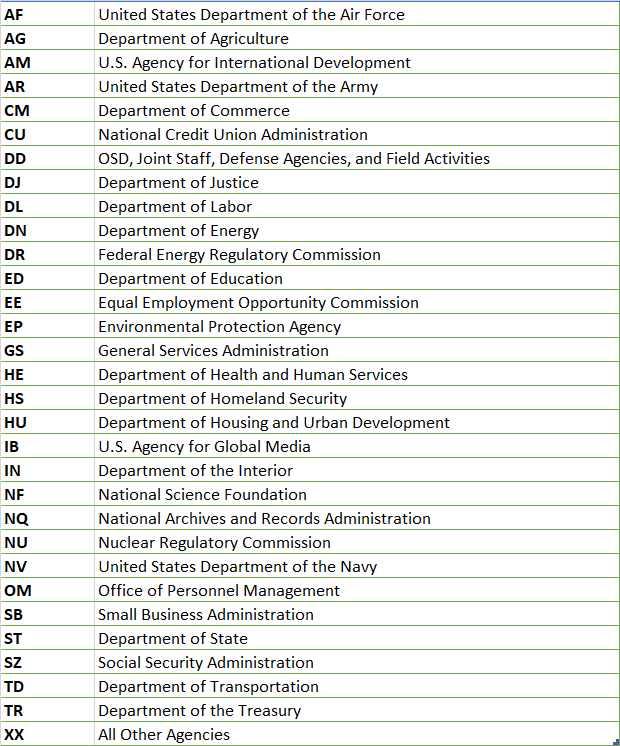

<AxesSubplot:xlabel='count', ylabel='agency'>

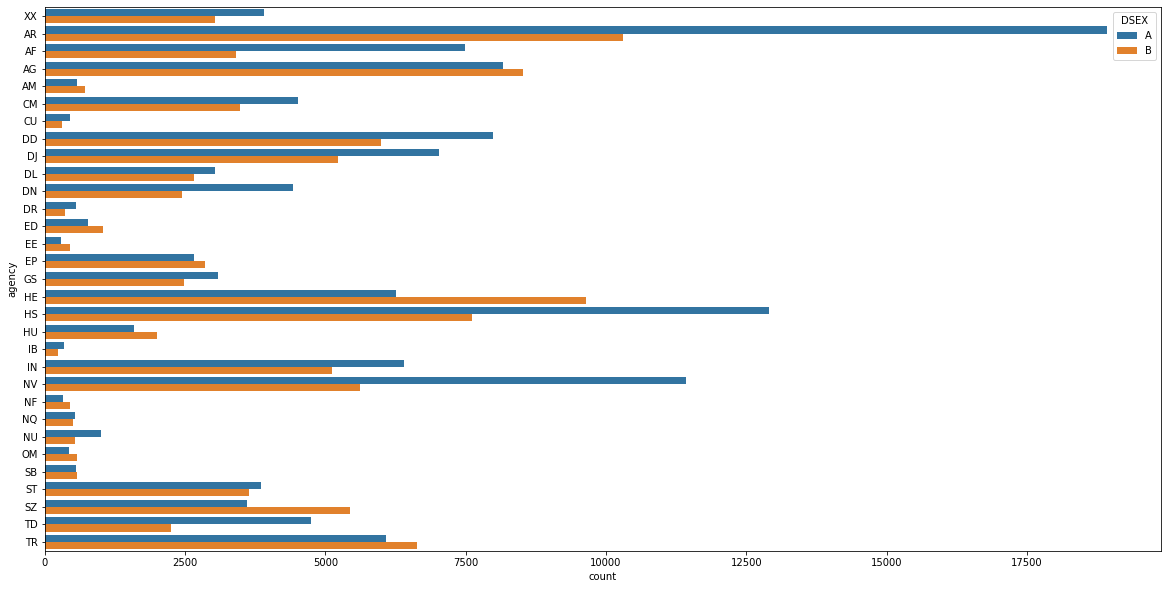

In [78]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.countplot(data=df_ca,y=df_ca['agency'],hue='DSEX' )

<AxesSubplot:xlabel='count', ylabel='agency'>

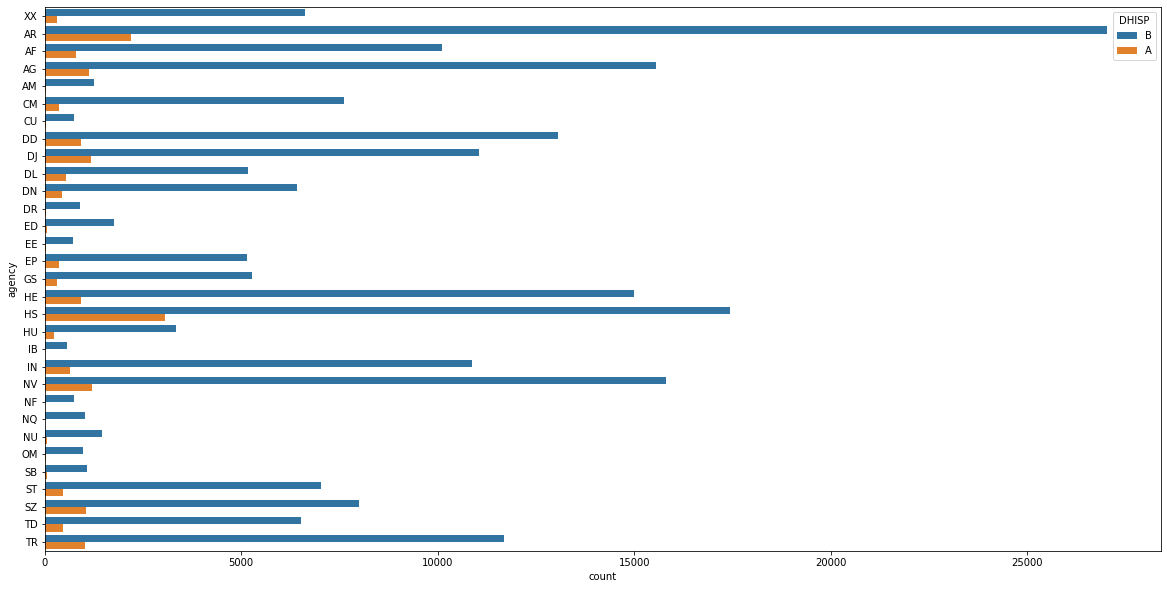

In [80]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_ca,y=df_ca['agency'],hue='DHISP' )

<AxesSubplot:xlabel='count', ylabel='agency'>

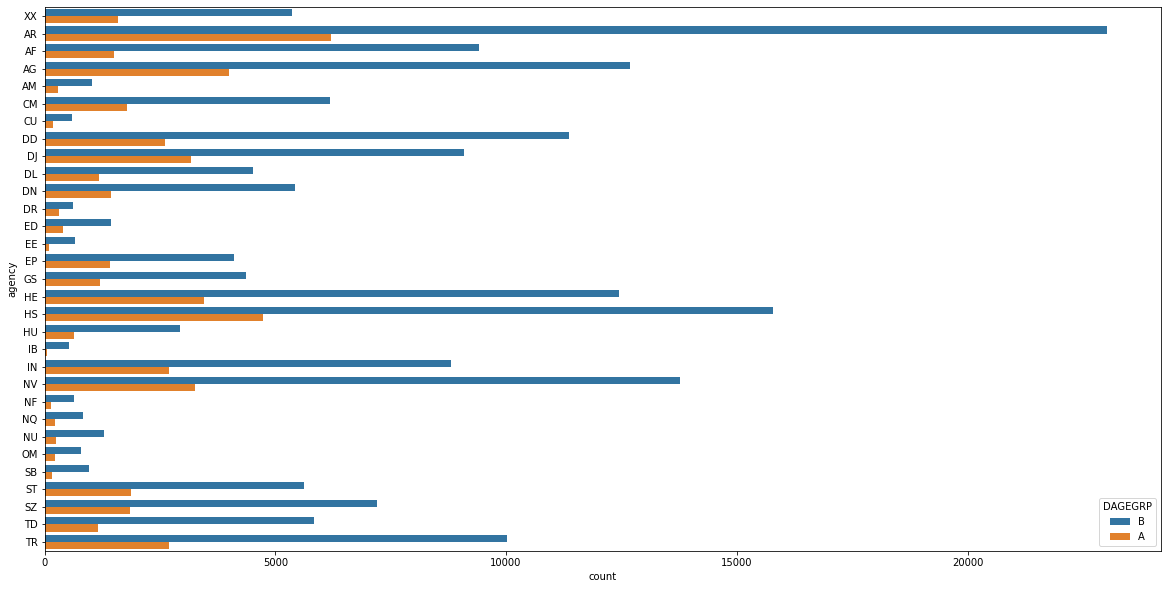

In [81]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_ca,y=df_ca['agency'],hue='DAGEGRP')

<AxesSubplot:xlabel='count', ylabel='agency'>

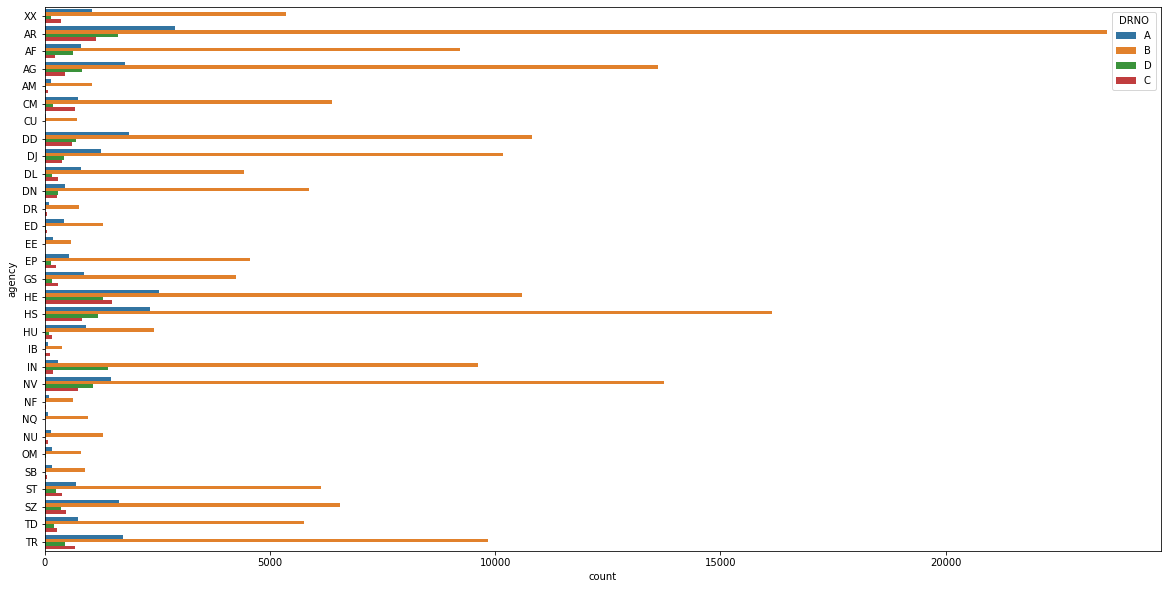

In [82]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_ca,y=df_ca['agency'],hue='DRNO')

<AxesSubplot:xlabel='count', ylabel='agency'>

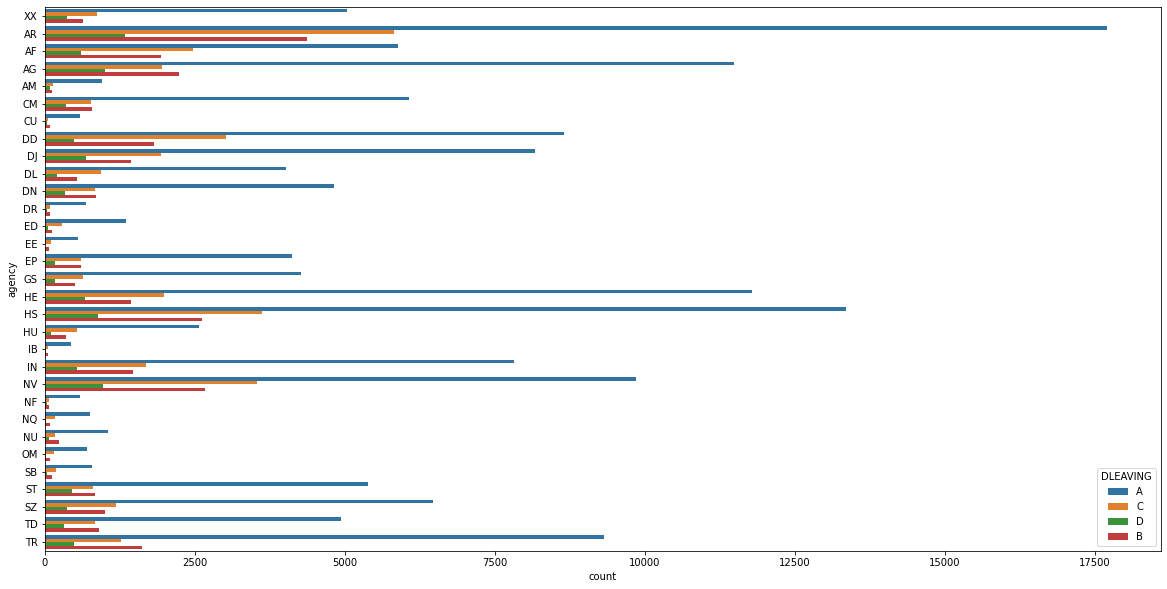

In [83]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_ca,y=df_ca['agency'],hue='DLEAVING')

In [84]:
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238119 entries, 0 to 292519
Data columns (total 79 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   RandomID  238119 non-null  int64  
 1   agency    238119 non-null  object 
 2   Q1        238119 non-null  float64
 3   Q2        238119 non-null  float64
 4   Q3        238119 non-null  float64
 5   Q4        238119 non-null  float64
 6   Q5        238119 non-null  float64
 7   Q6        238119 non-null  float64
 8   Q7        238119 non-null  float64
 9   Q8        238119 non-null  float64
 10  Q9        238119 non-null  float64
 11  Q10       238119 non-null  float64
 12  Q11       238119 non-null  float64
 13  Q12       238119 non-null  float64
 14  Q13       238119 non-null  float64
 15  Q14       238119 non-null  float64
 16  Q15       238119 non-null  float64
 17  Q16       238119 non-null  float64
 18  Q17       238119 non-null  float64
 19  Q18       238119 non-null  float64
 20  Q19 

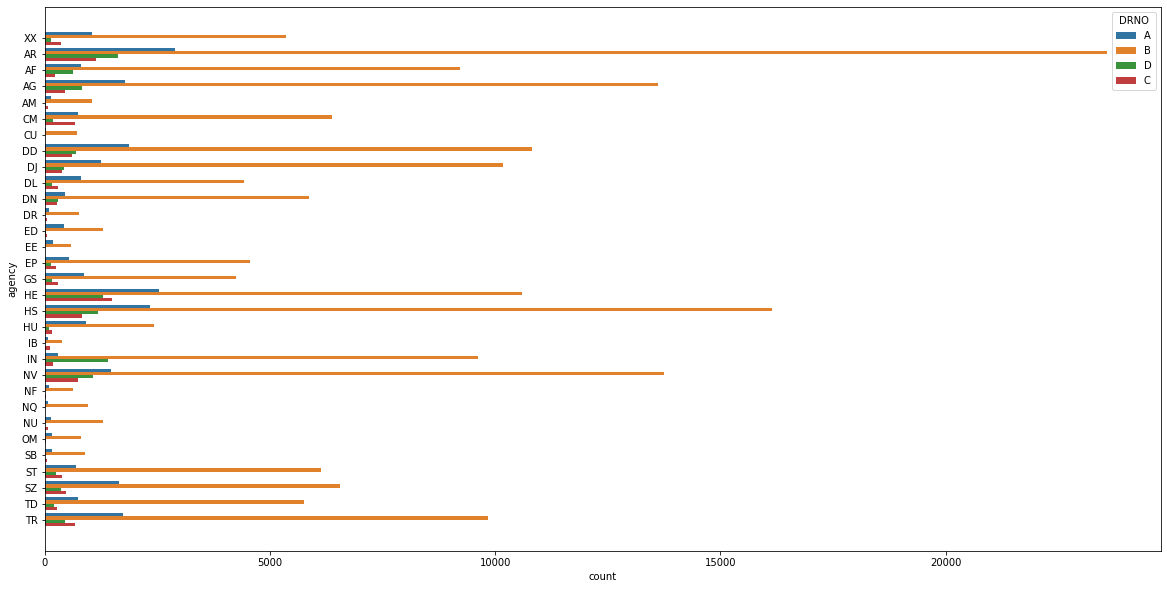

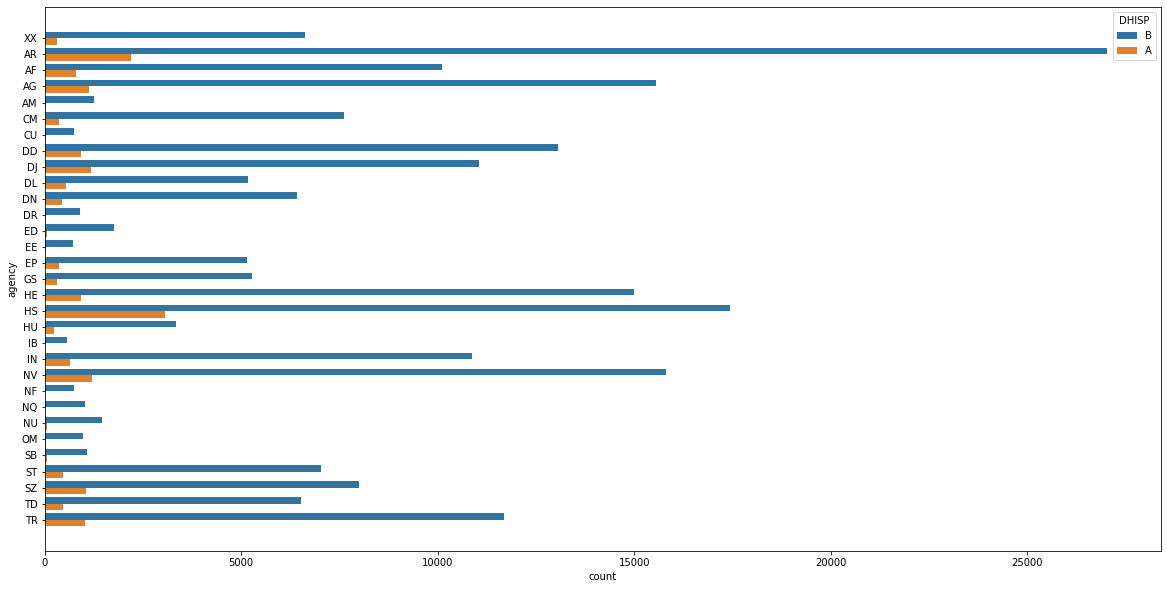

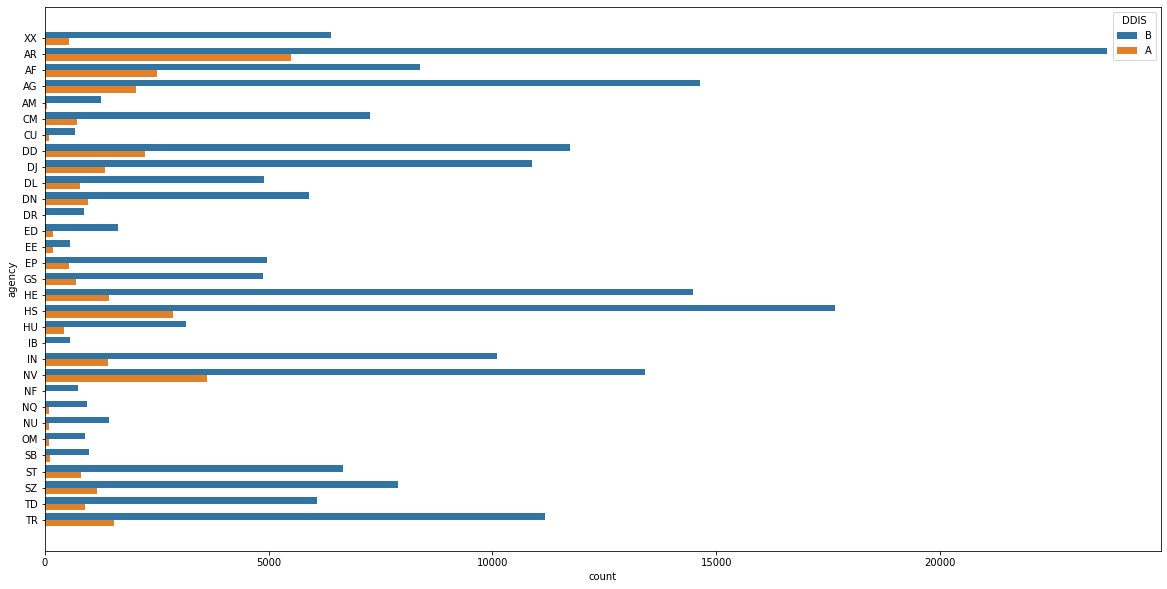

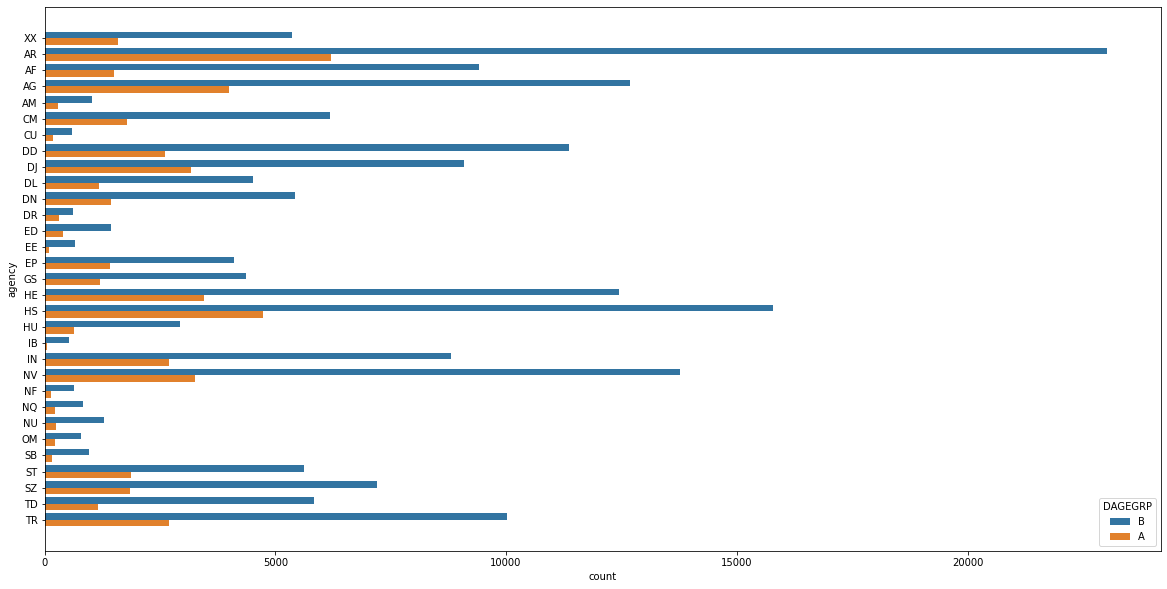

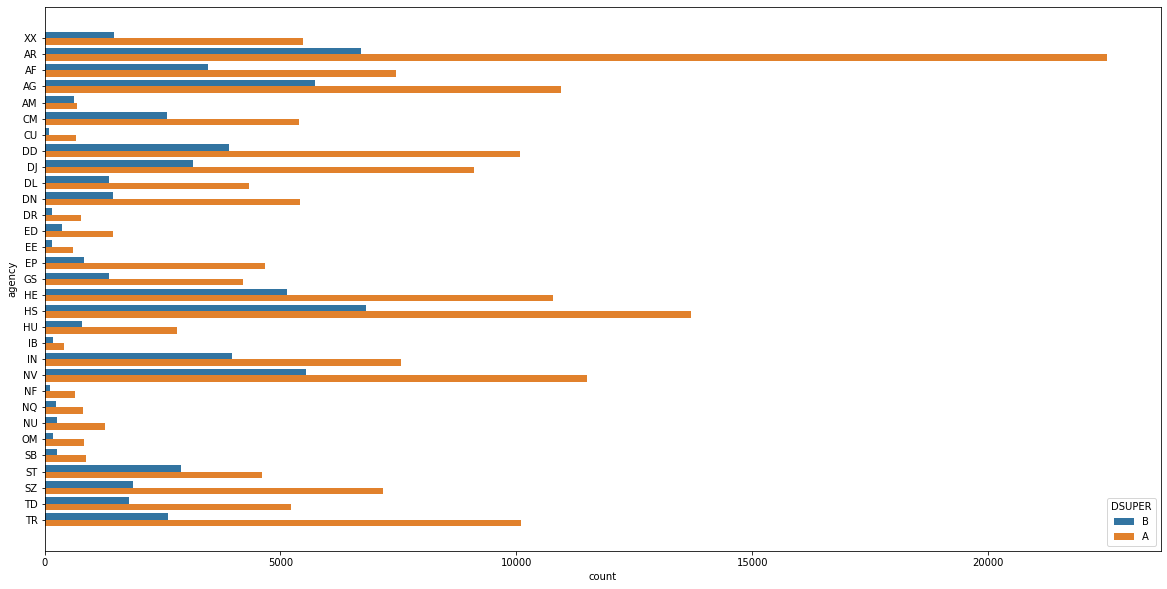

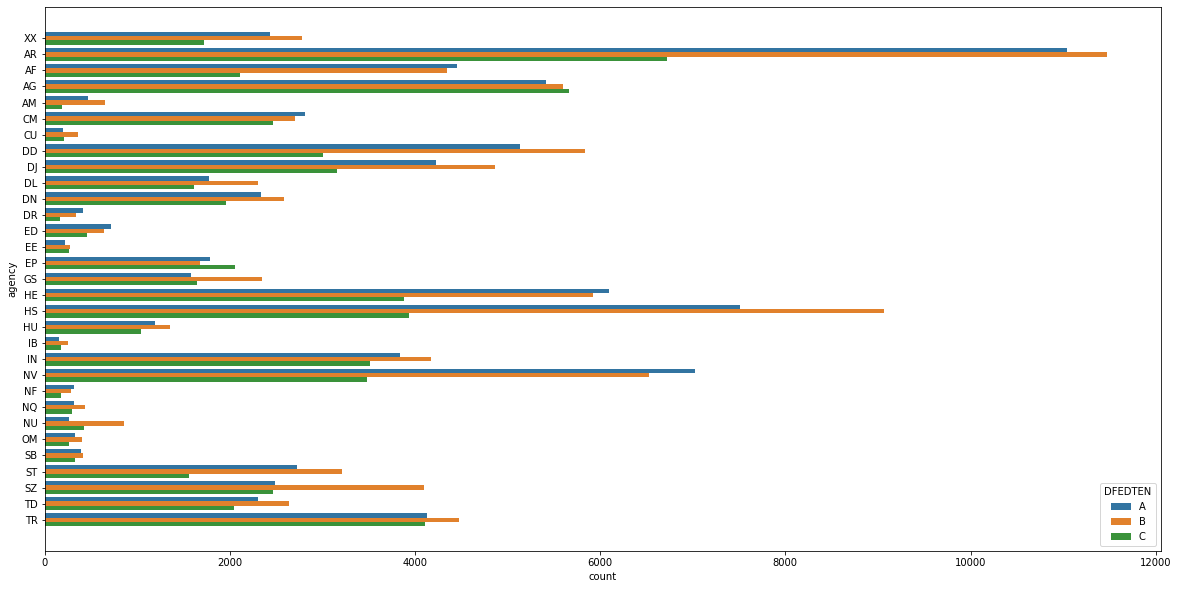

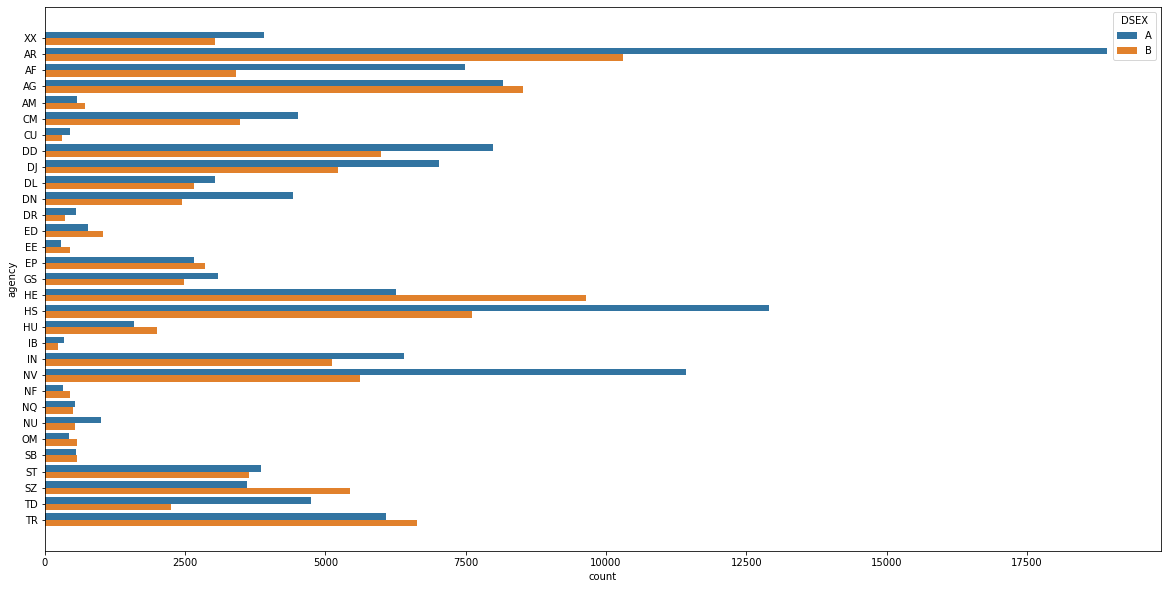

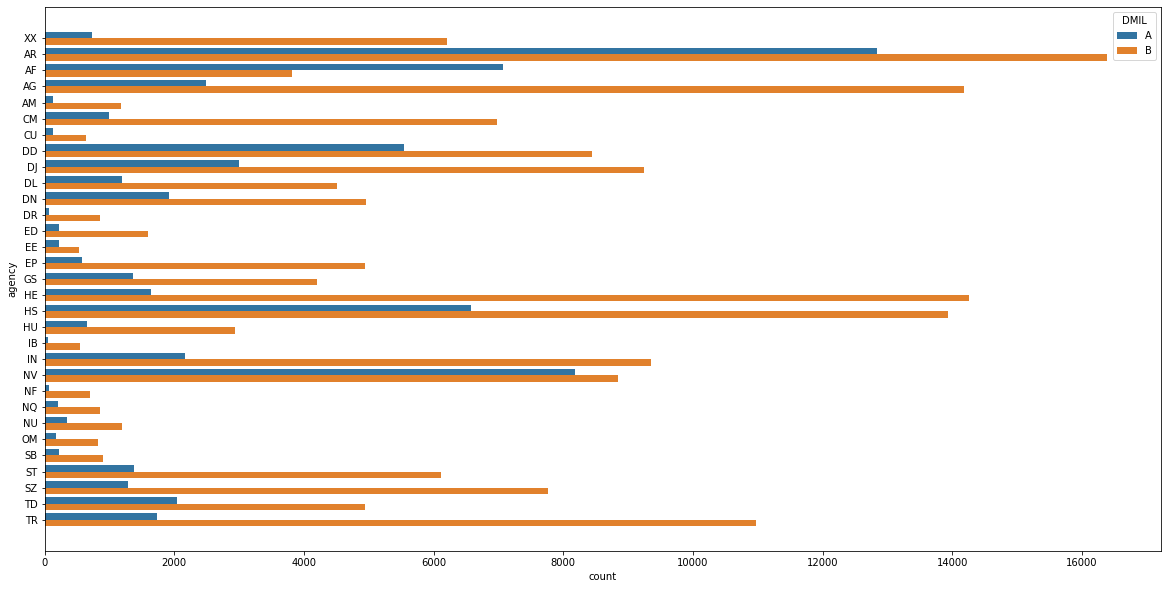

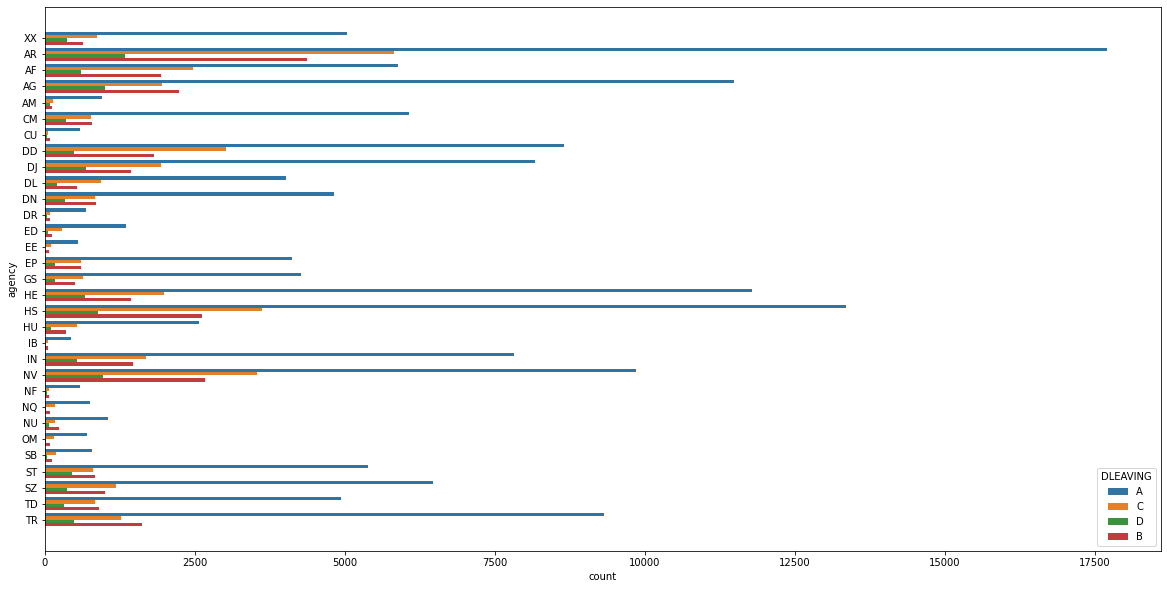

In [104]:
objects = [column for column, is_type in (df_c.dtypes=="object").items() if is_type]
objects.remove('agency')
#plt.figure(figsize=(20,10))
for i in objects:
    plt.figure(figsize=(20,10))
    sns.countplot(data=df_ca,y=df_ca['agency'],hue=i)
    plt.plot()

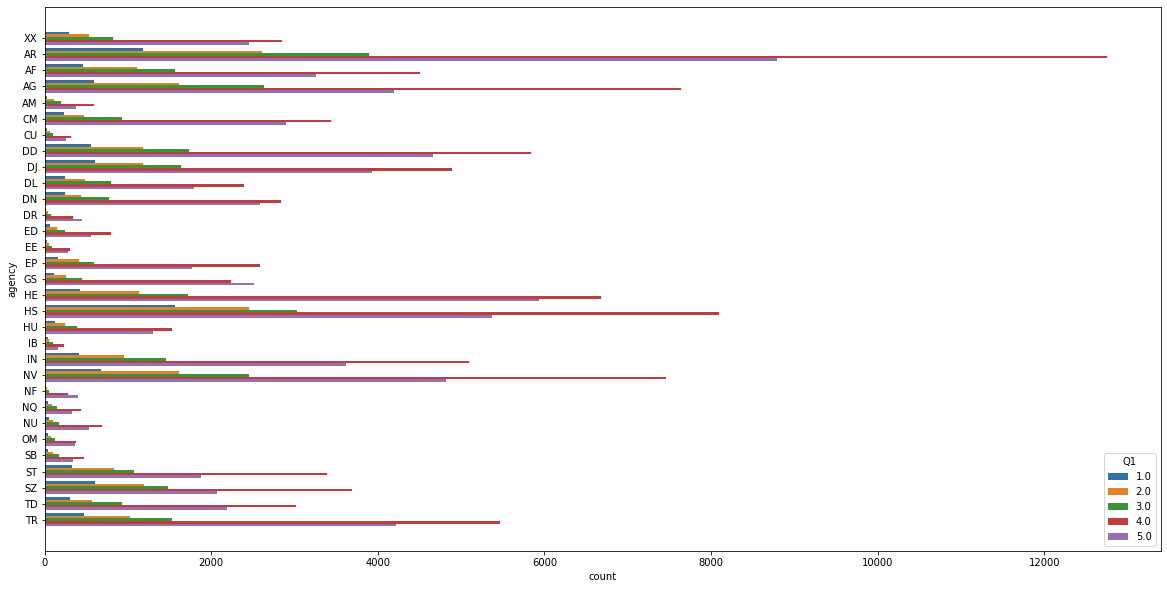

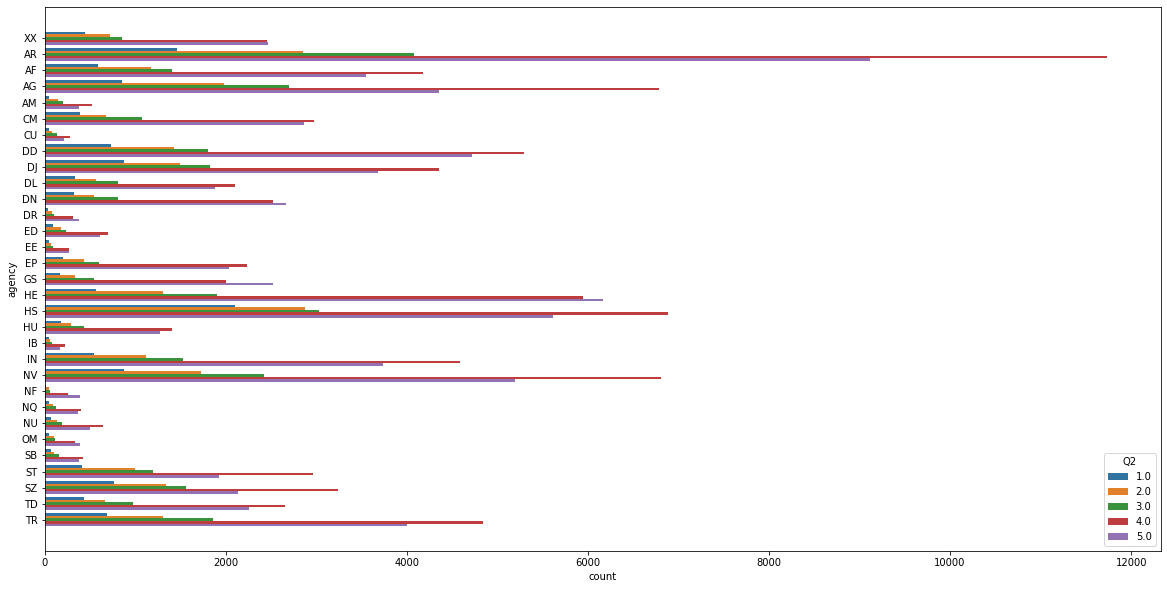

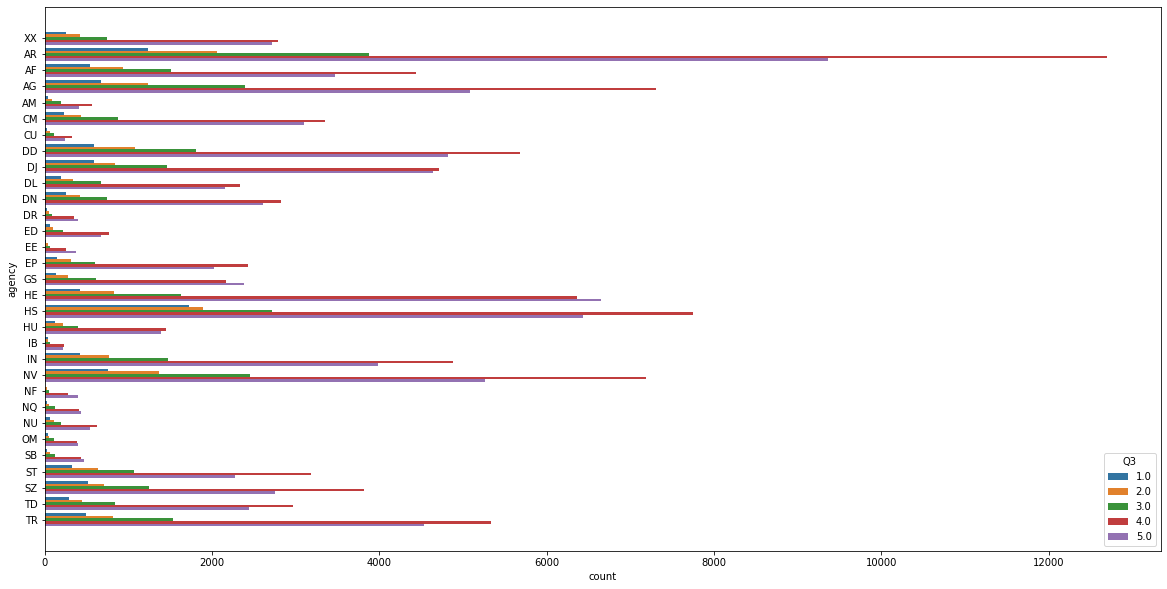

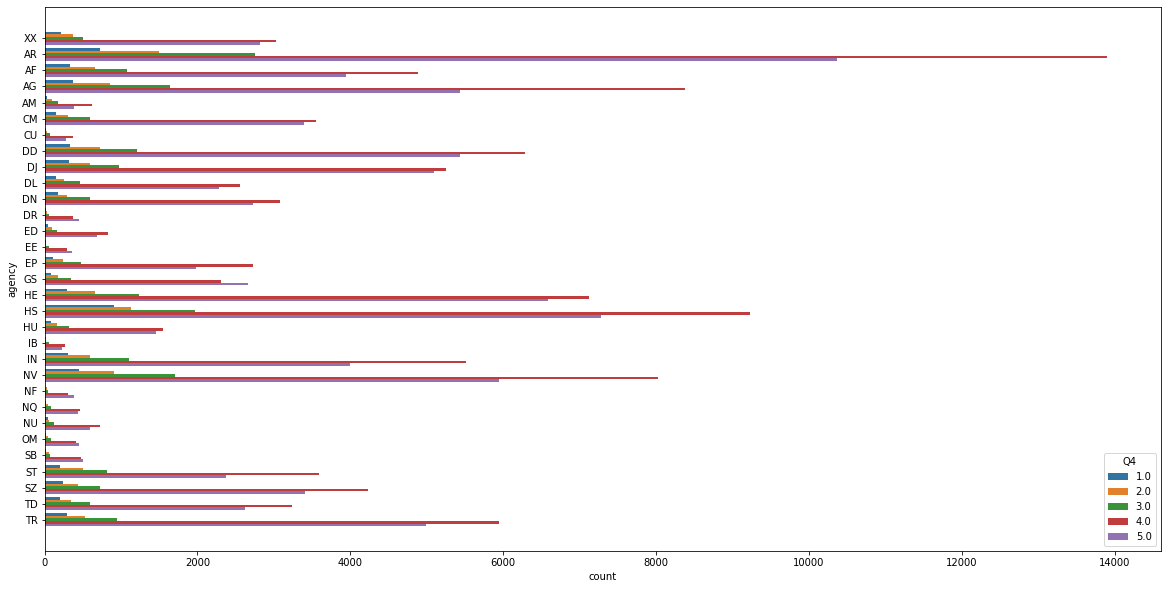

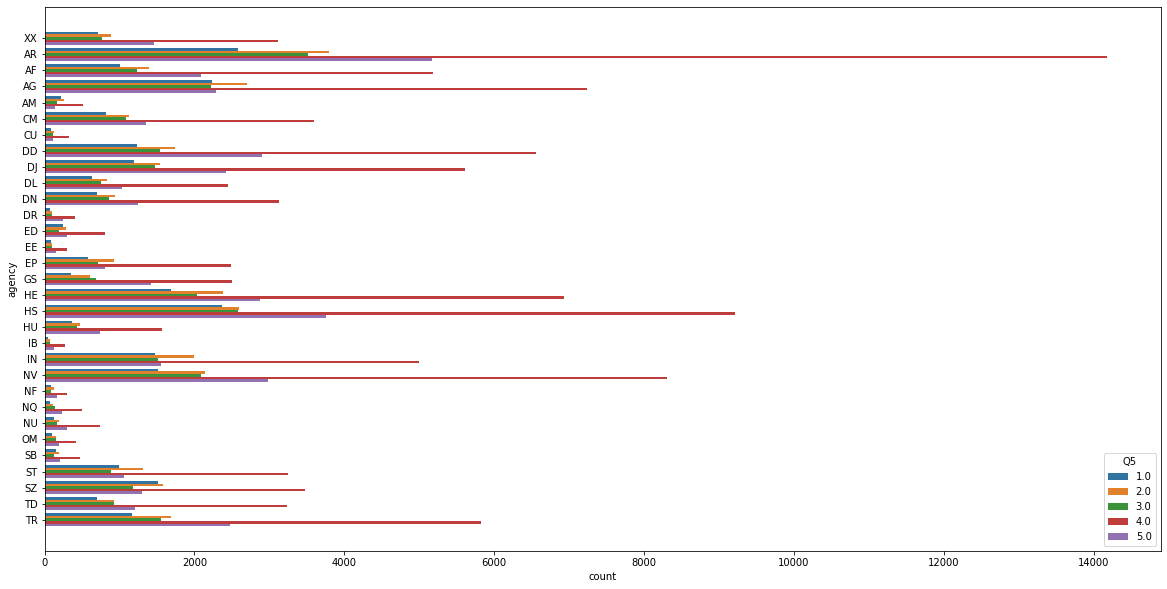

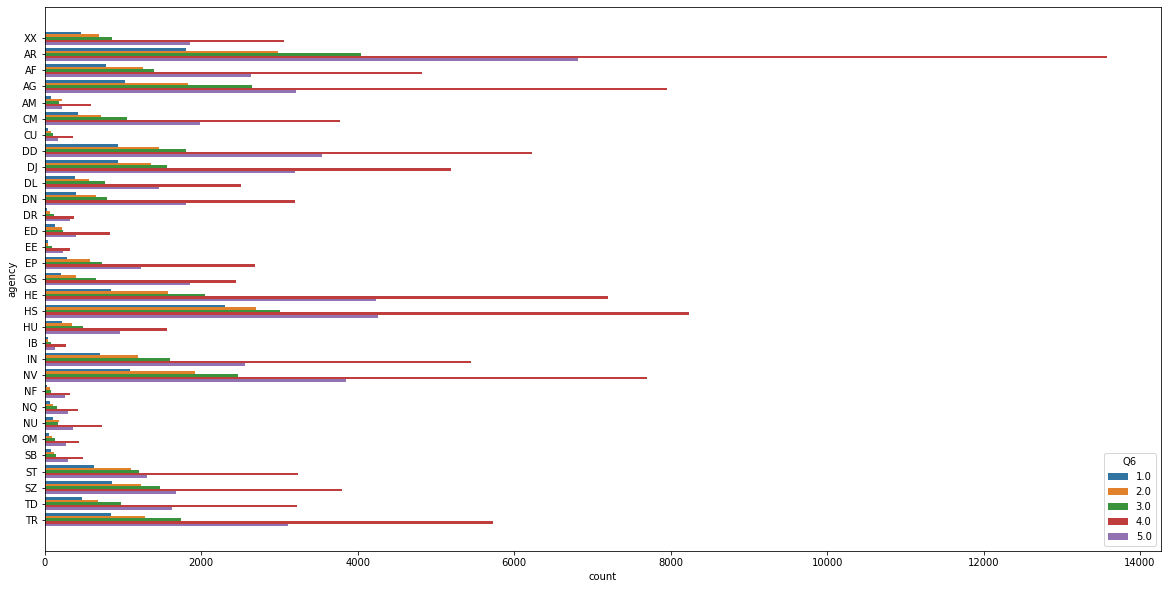

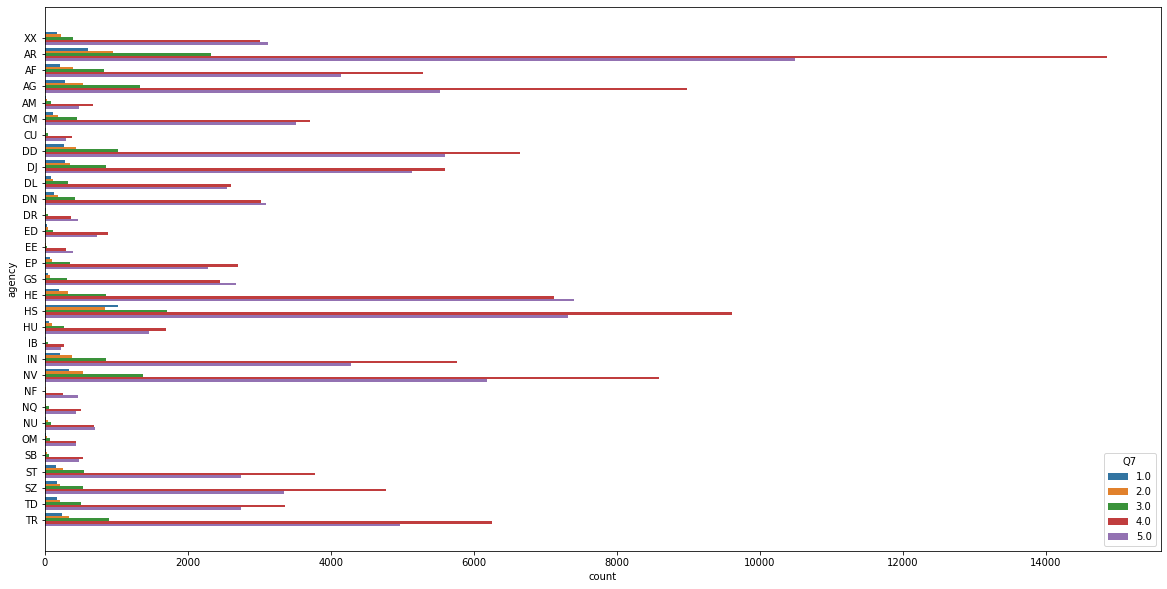

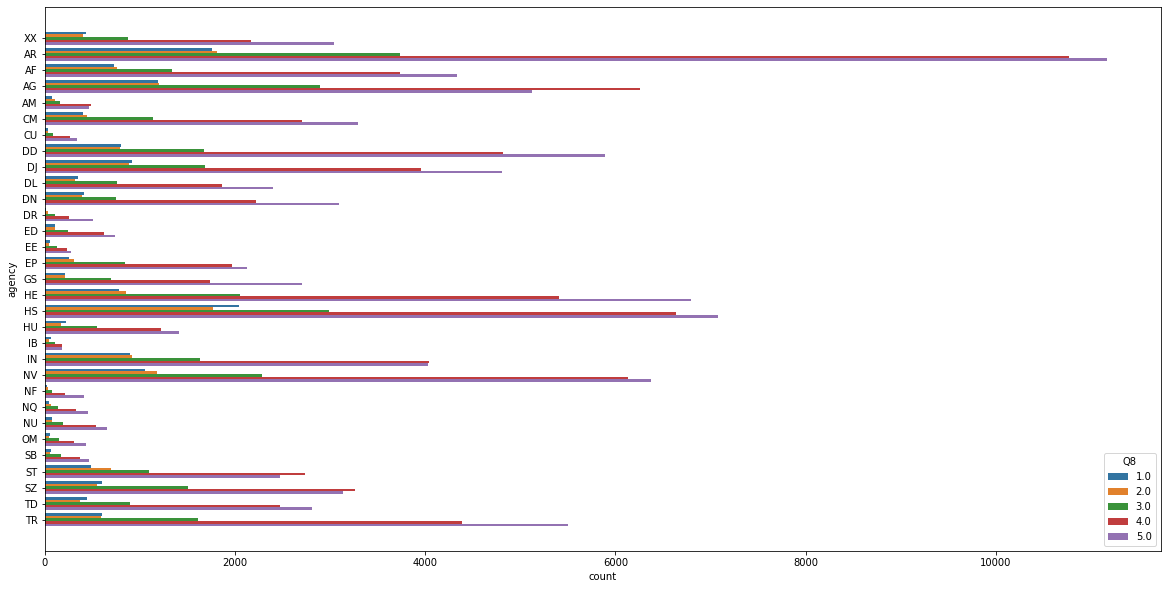

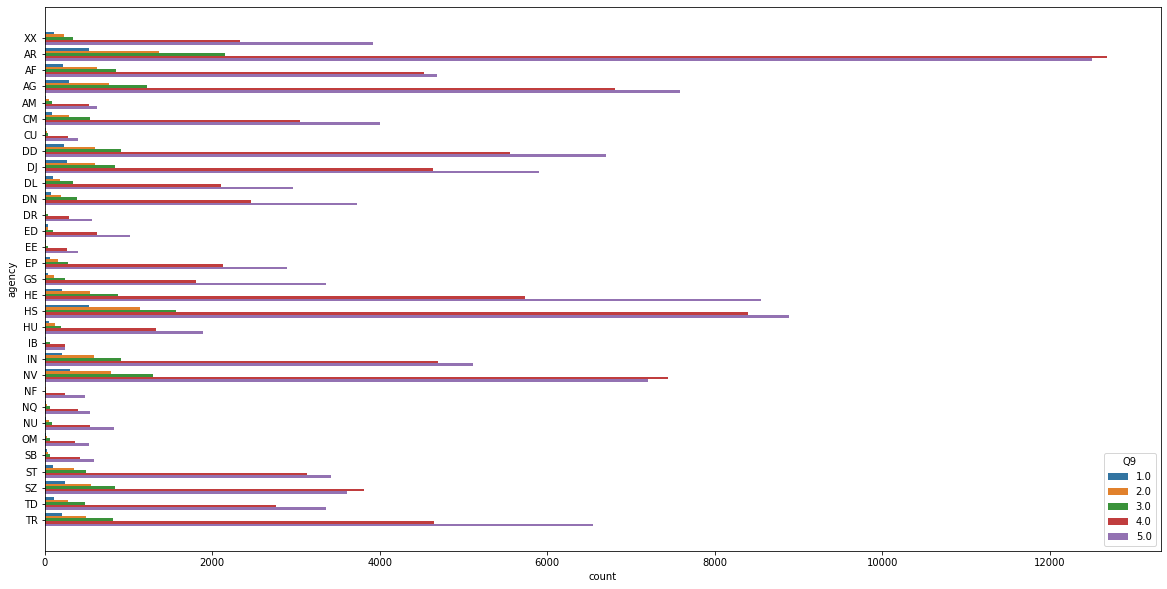

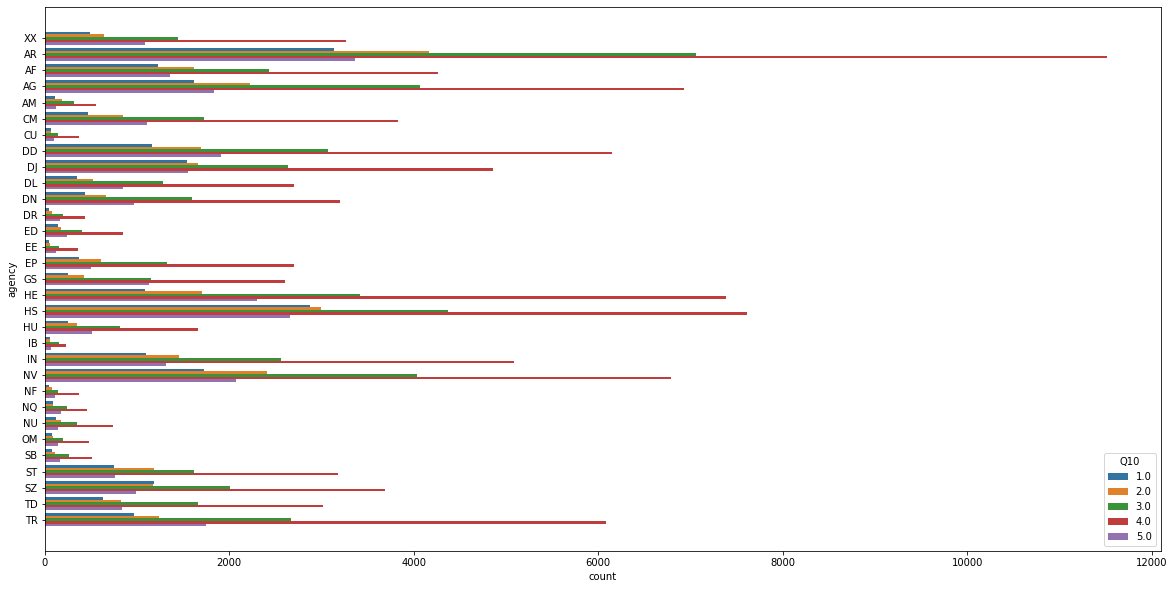

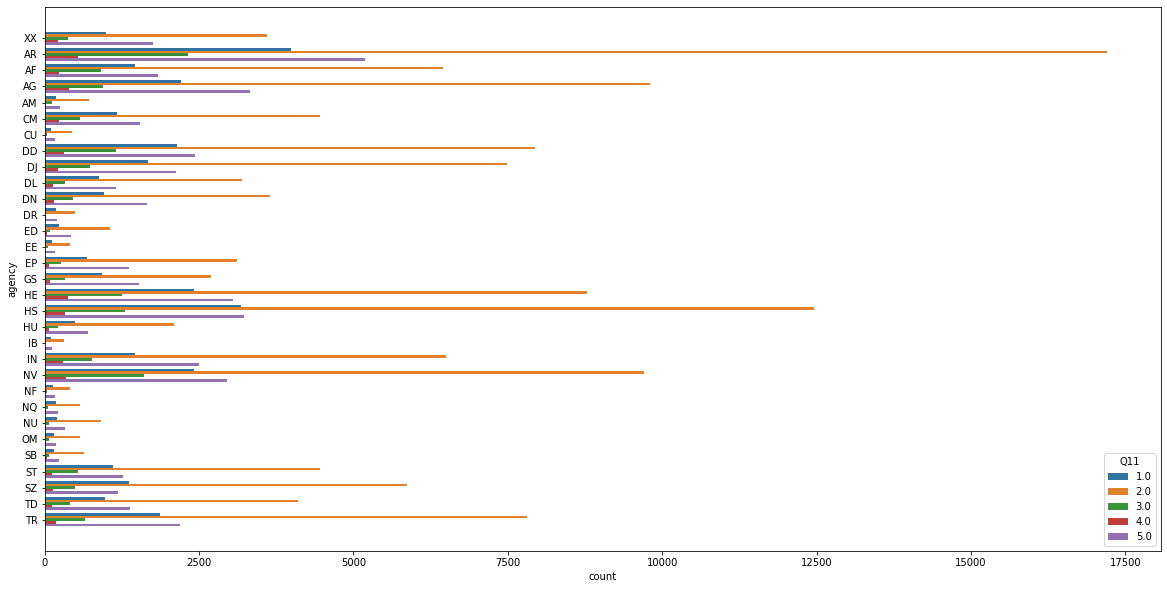

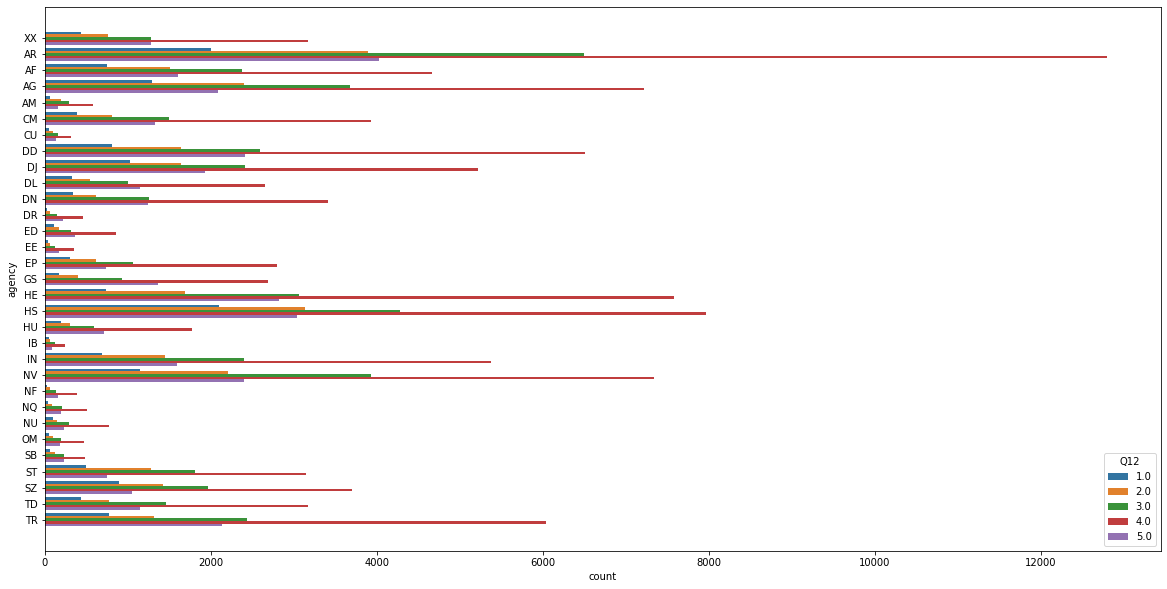

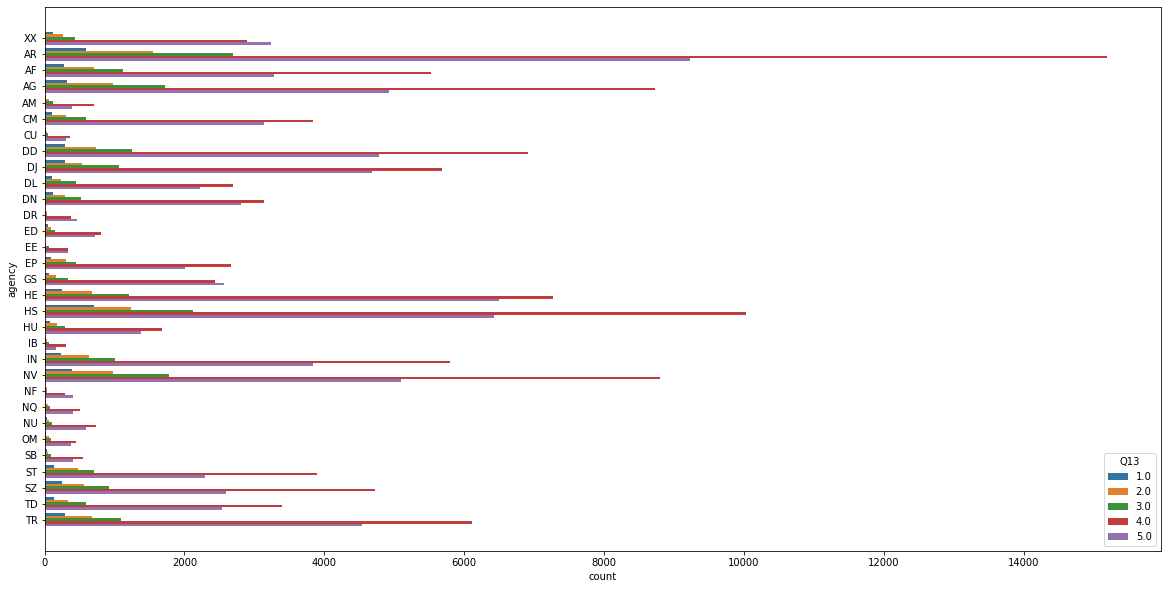

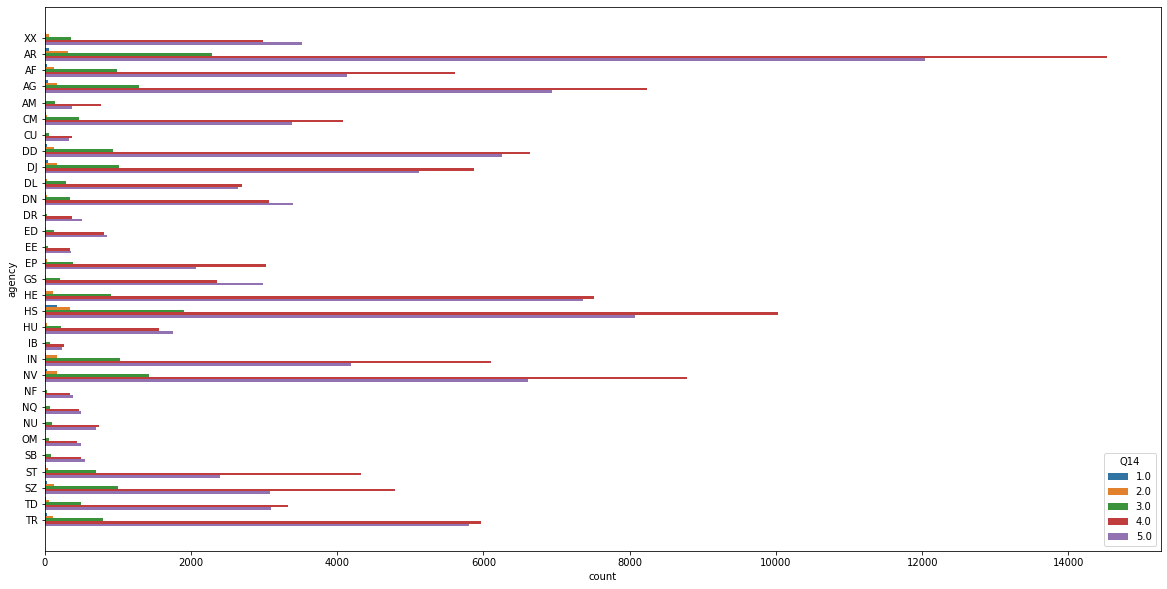

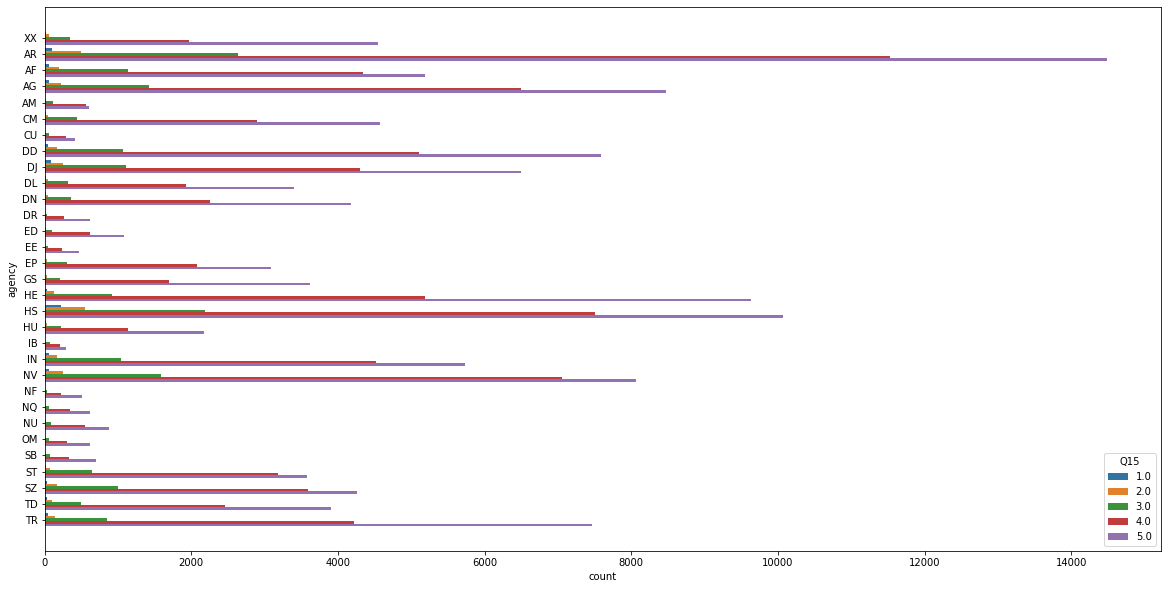

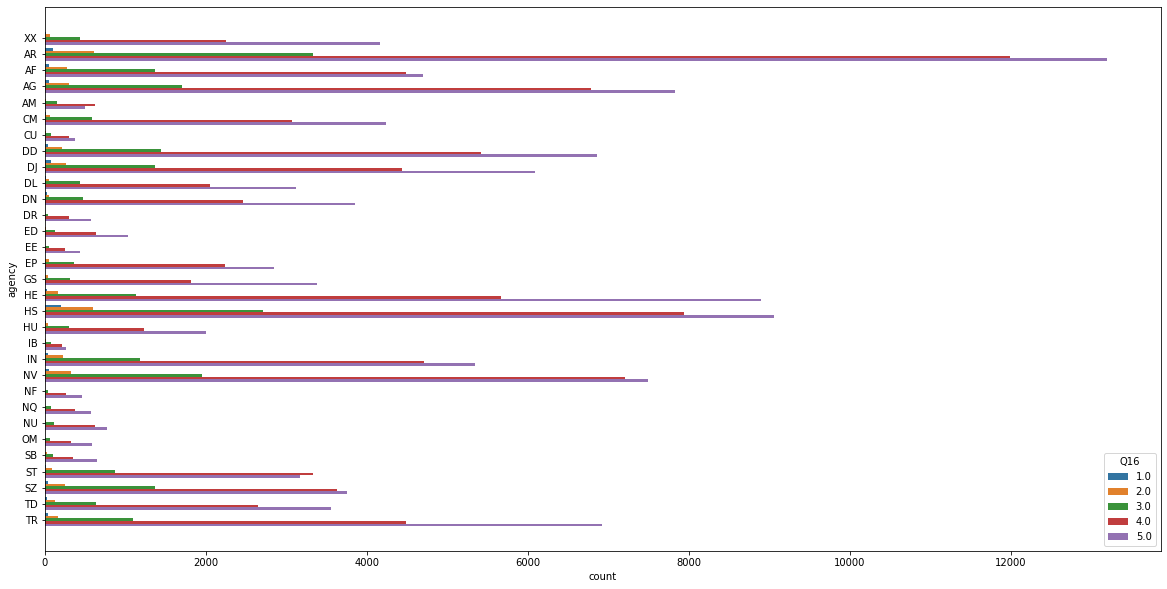

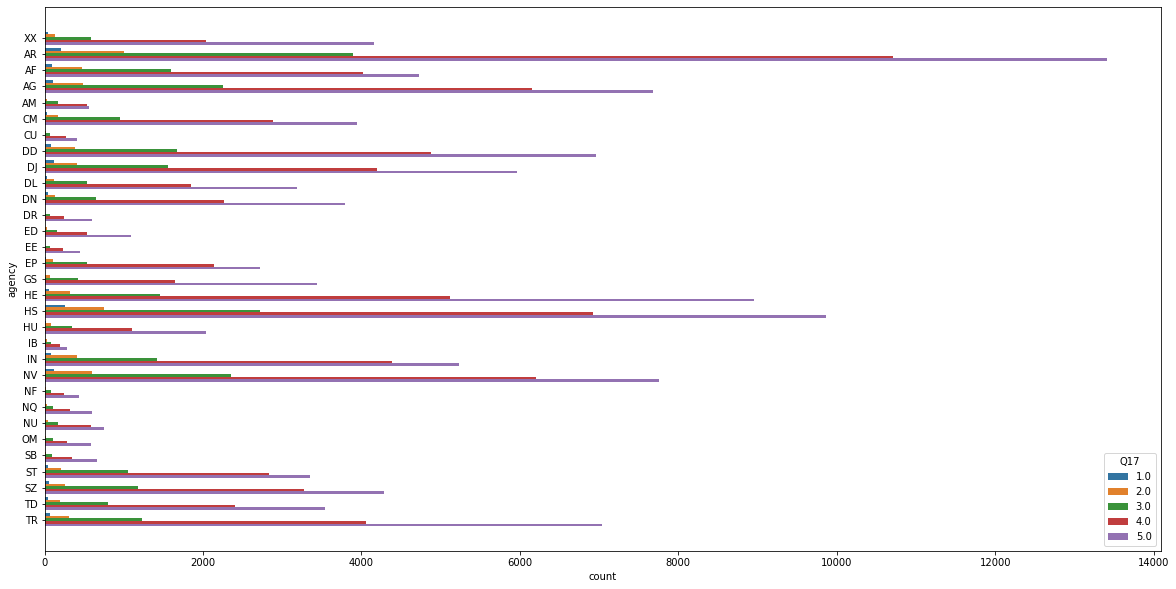

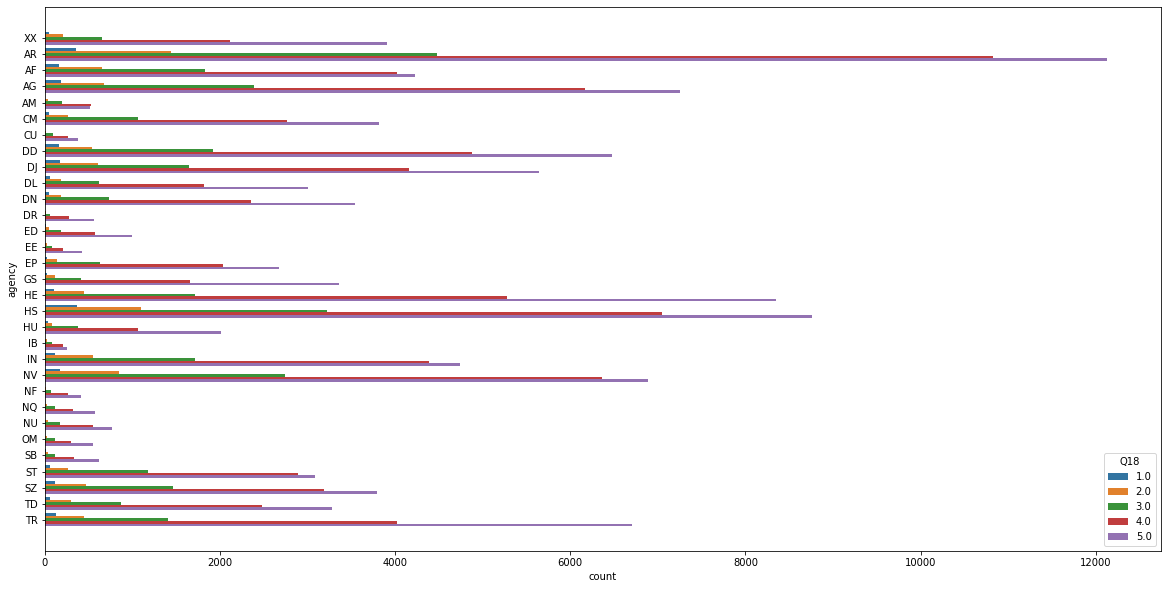

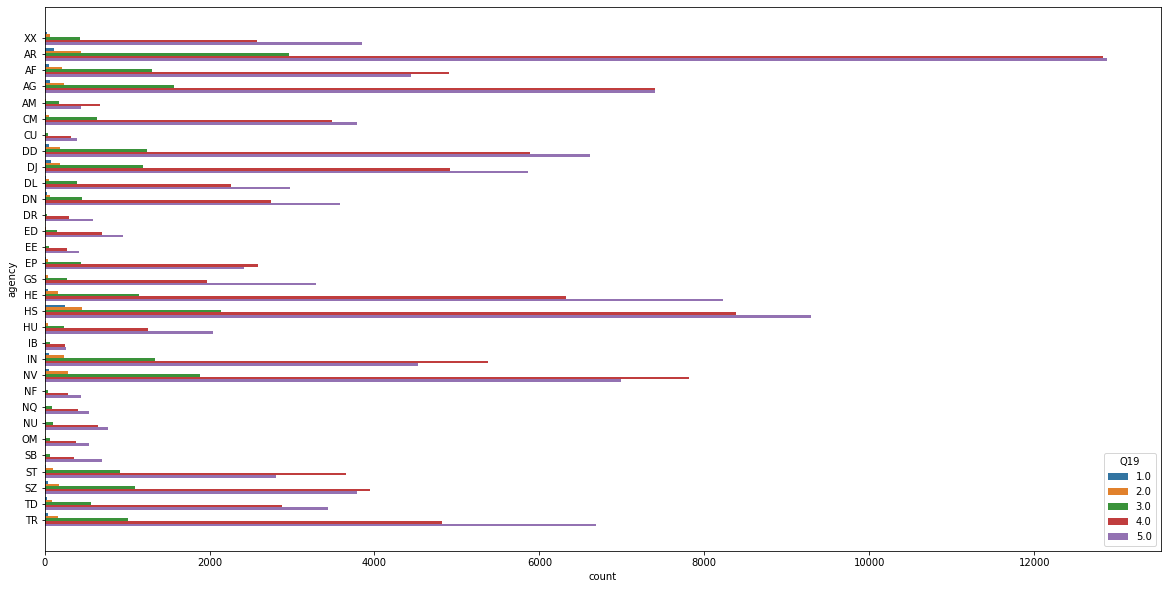

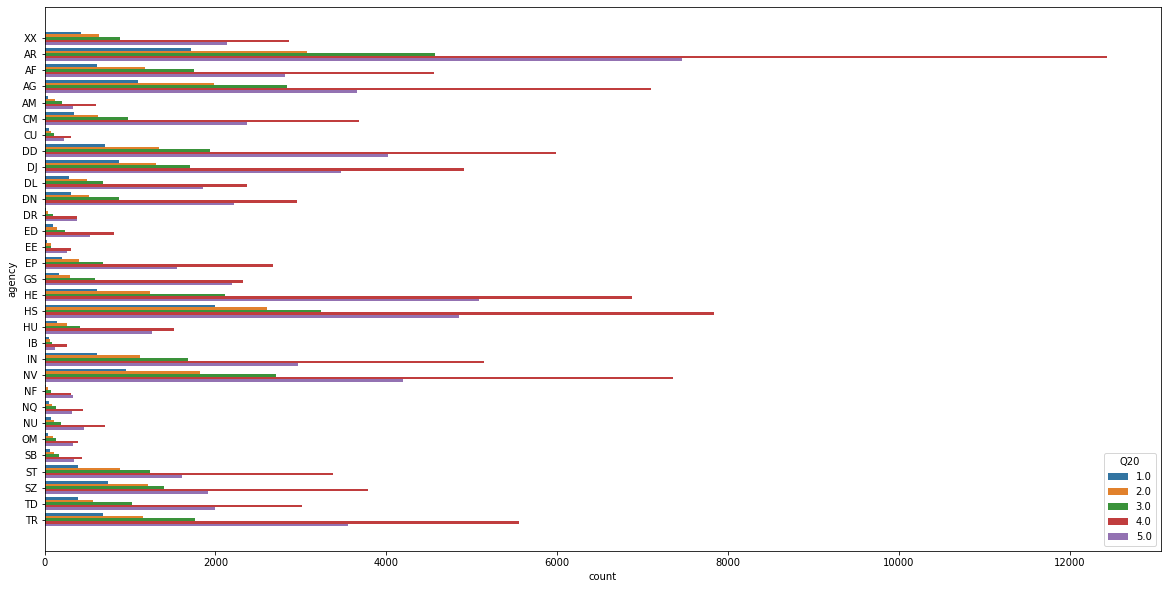

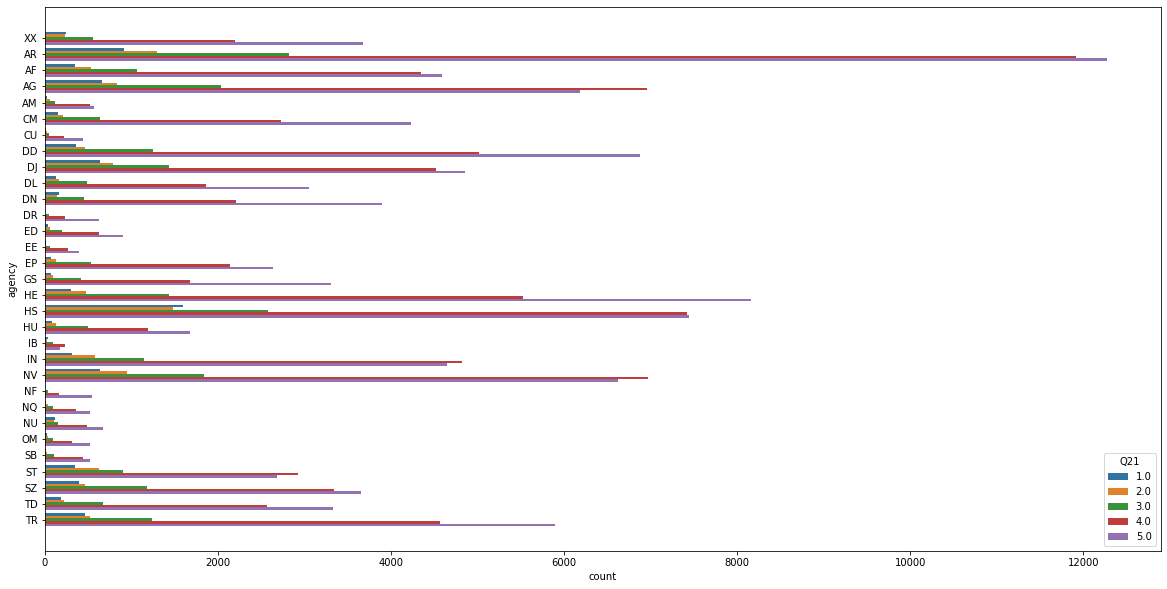

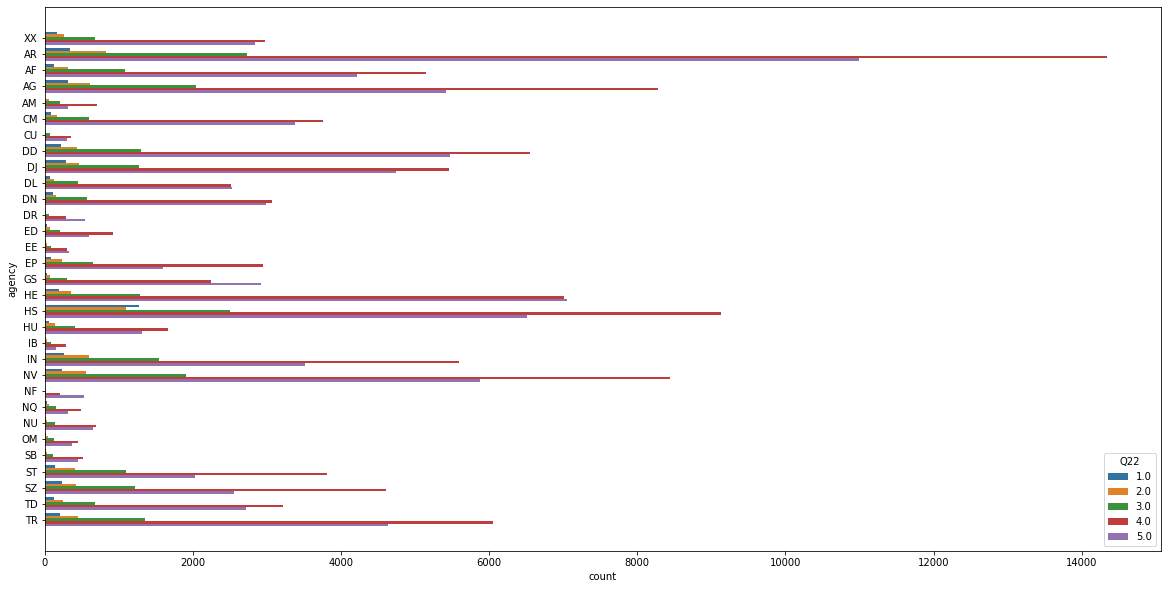

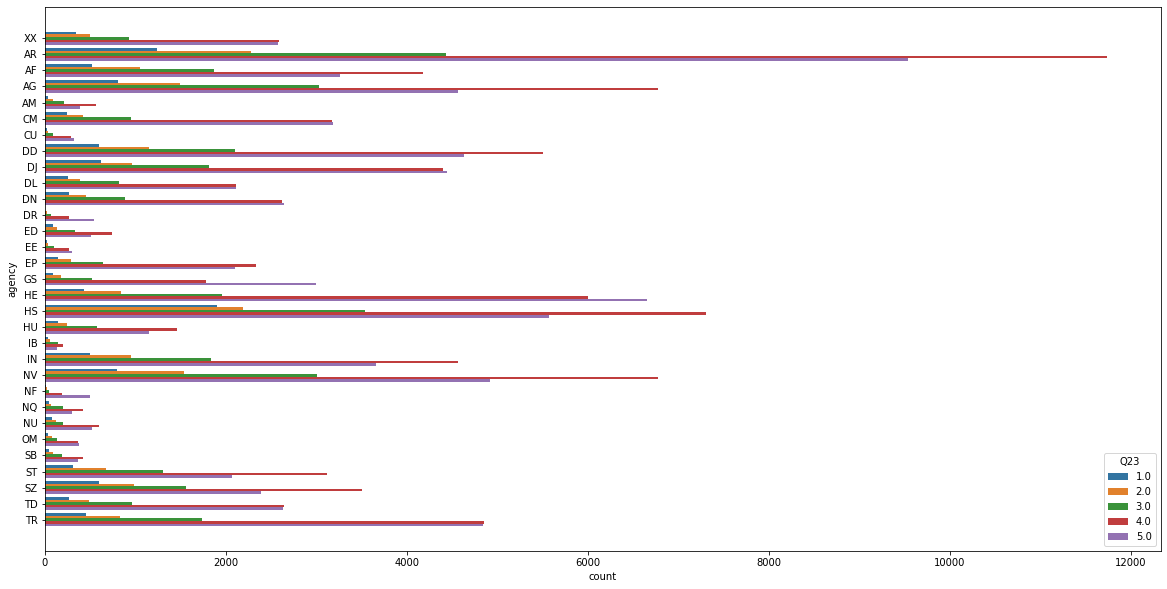

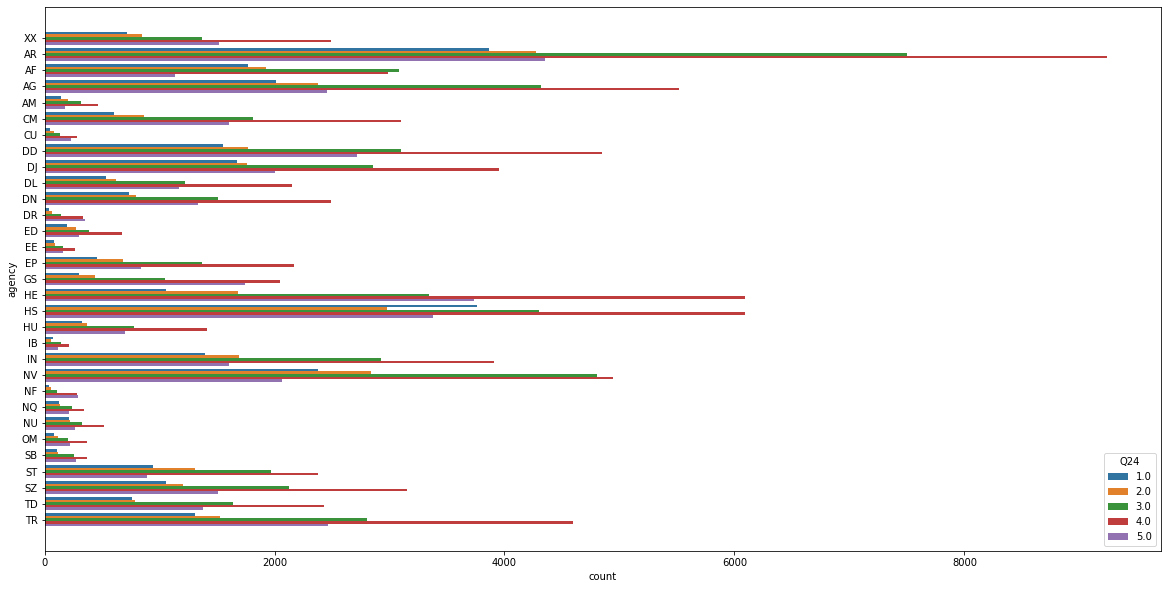

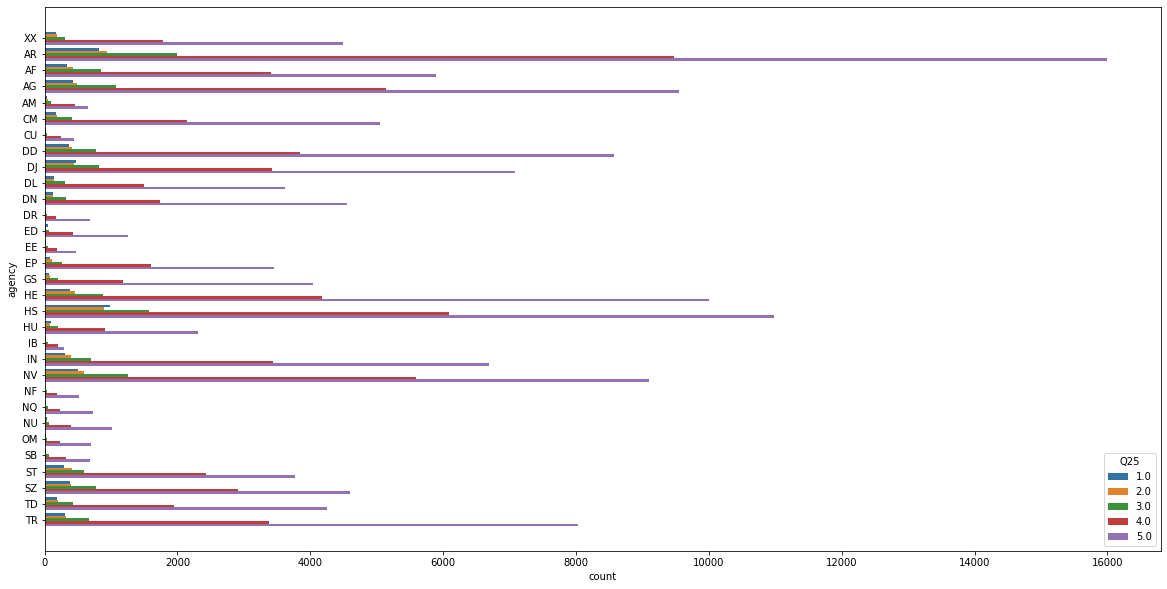

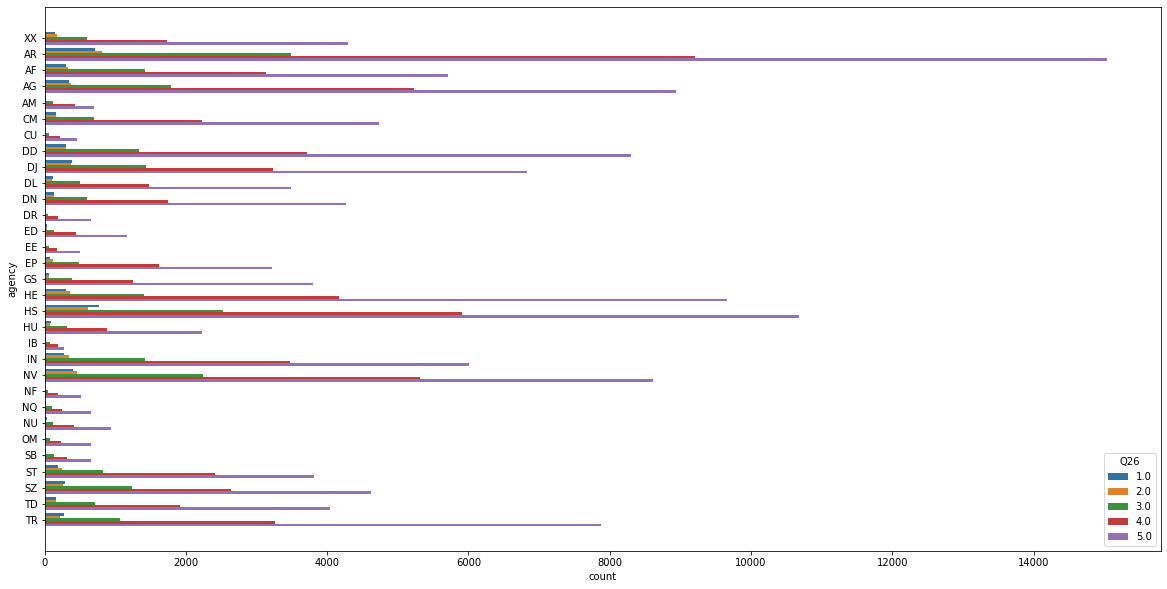

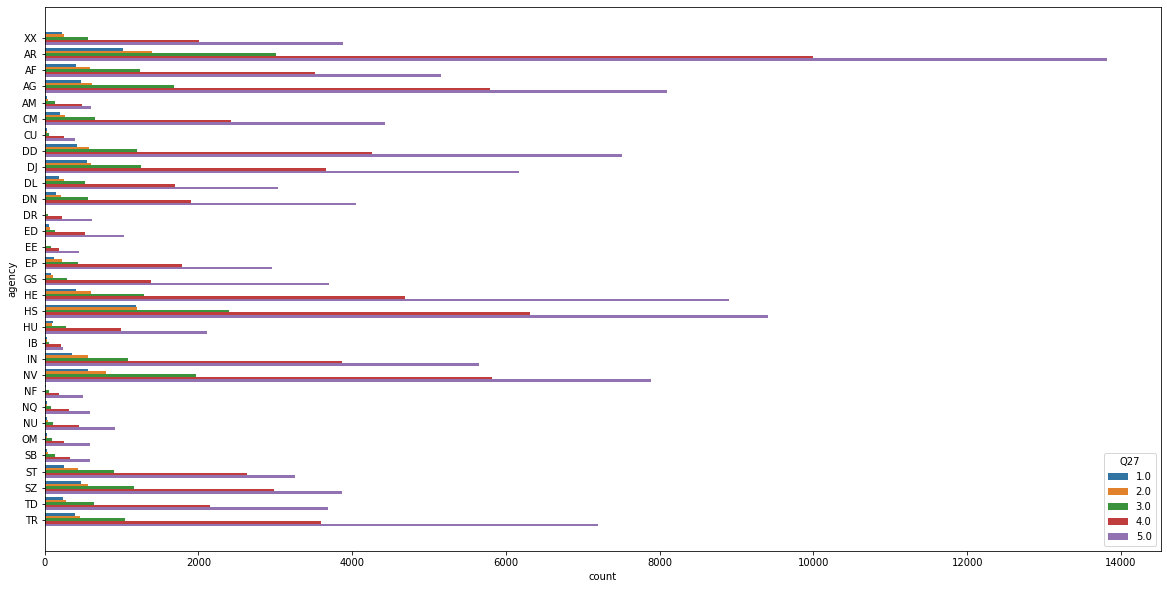

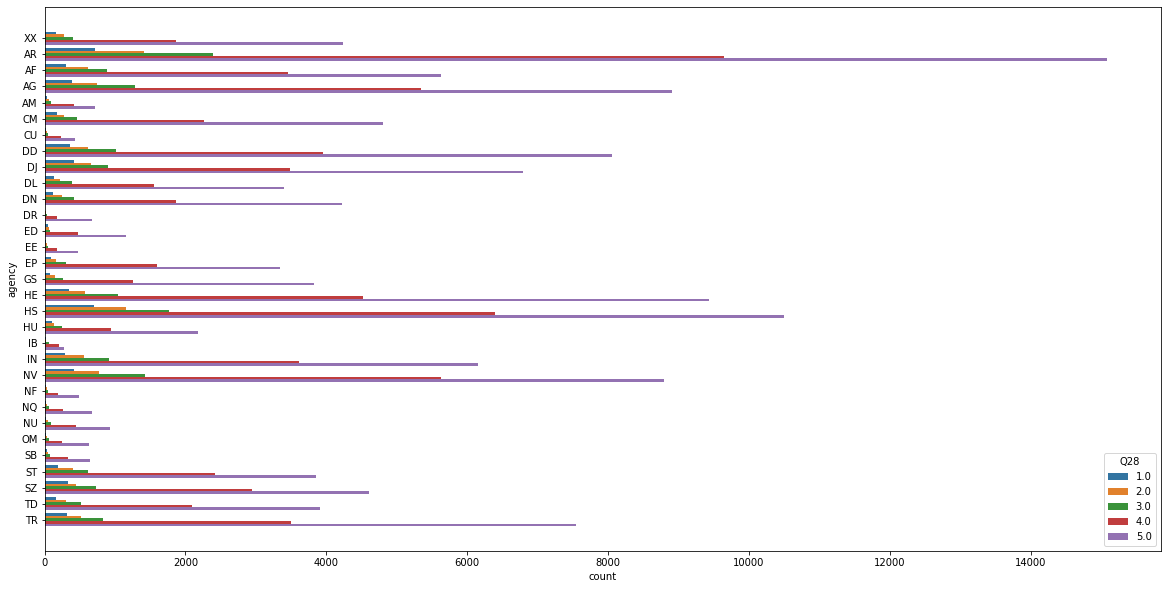

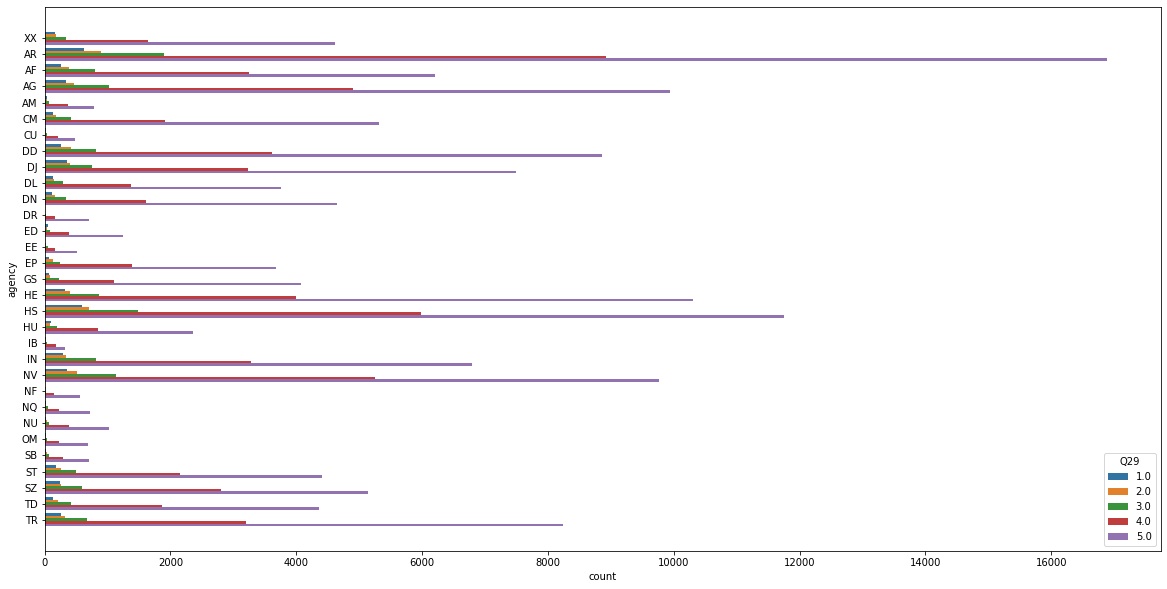

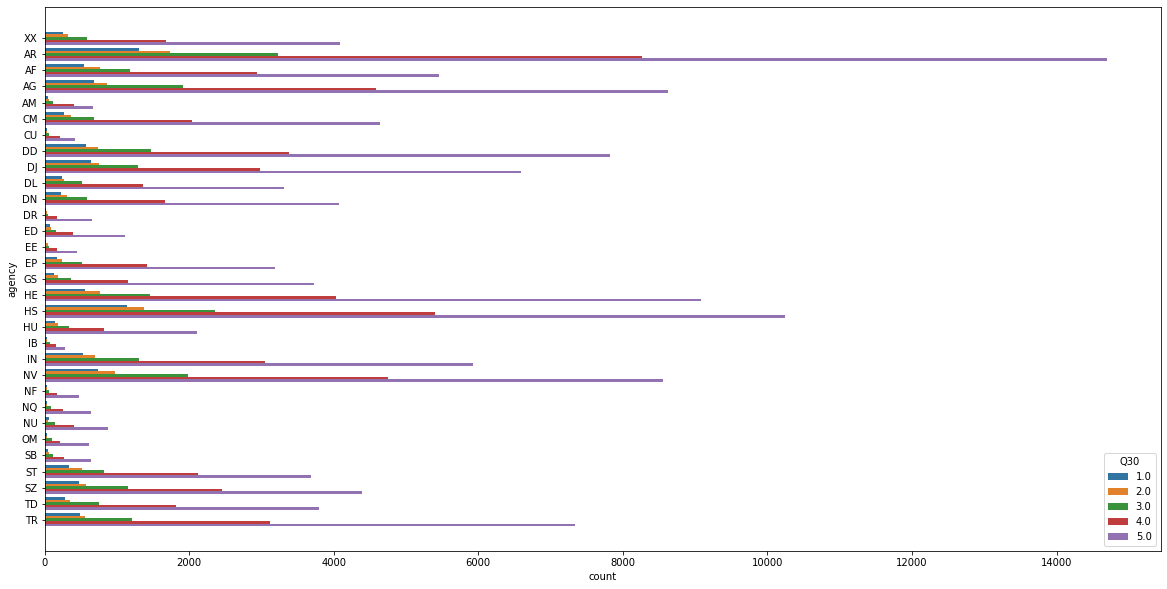

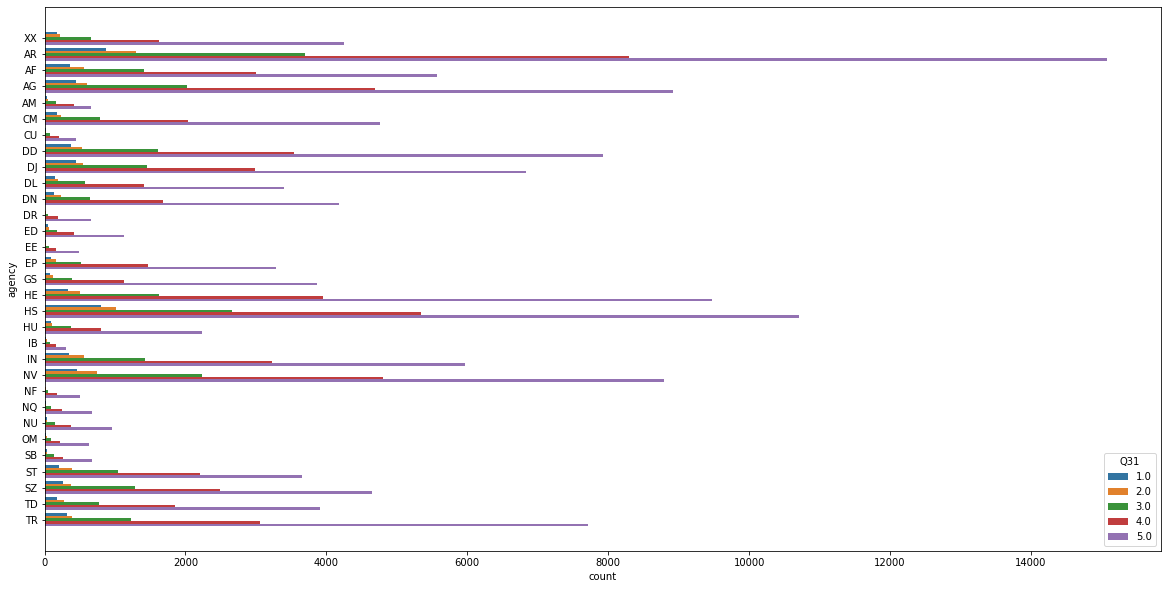

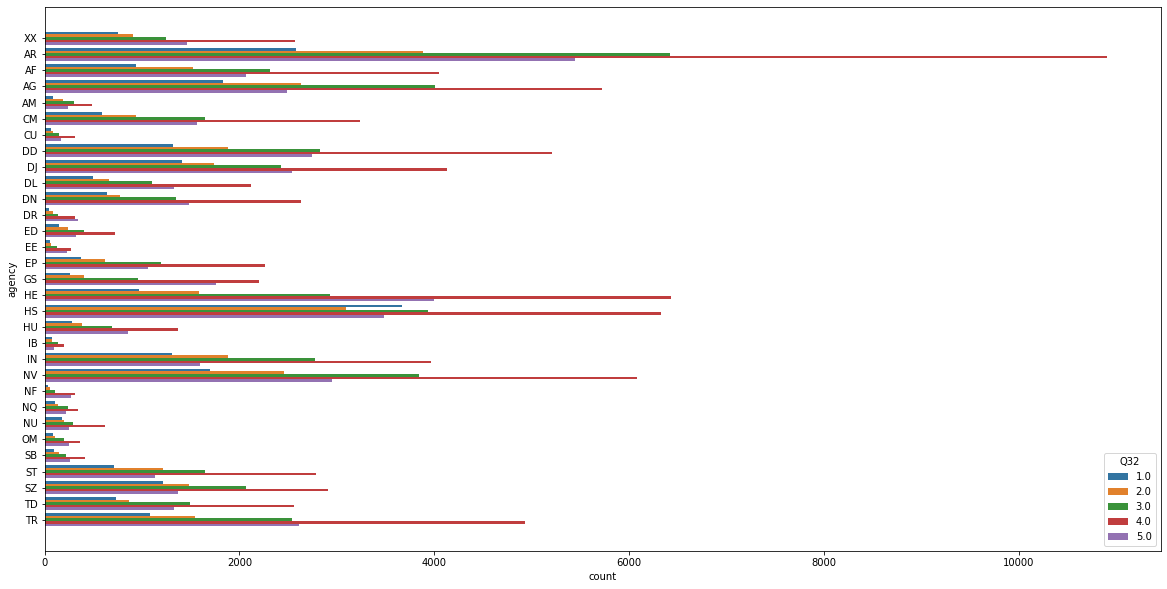

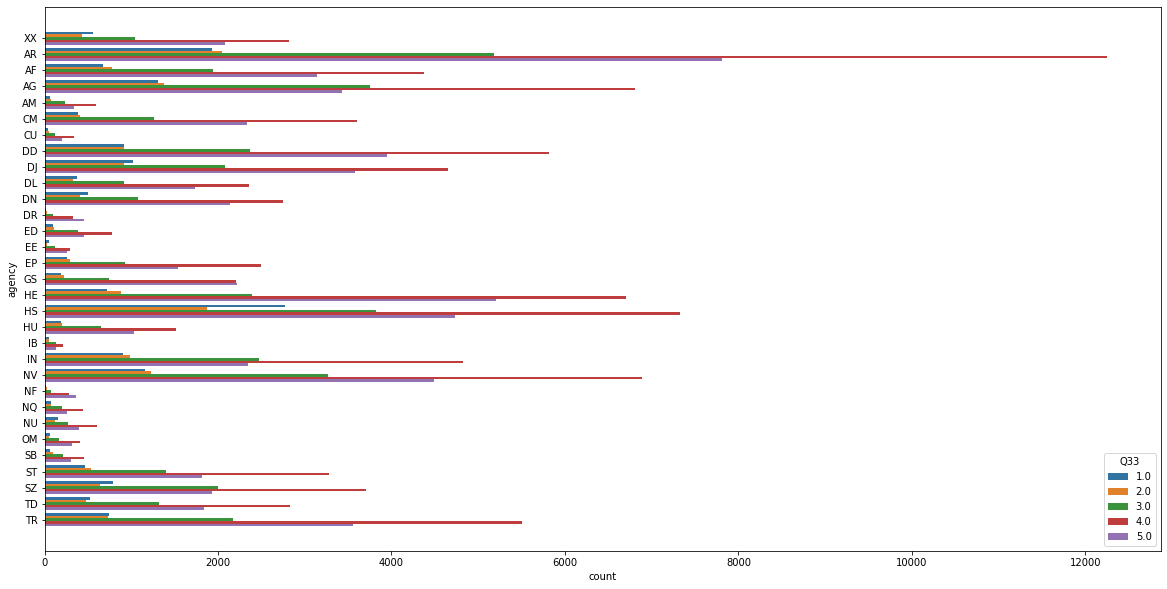

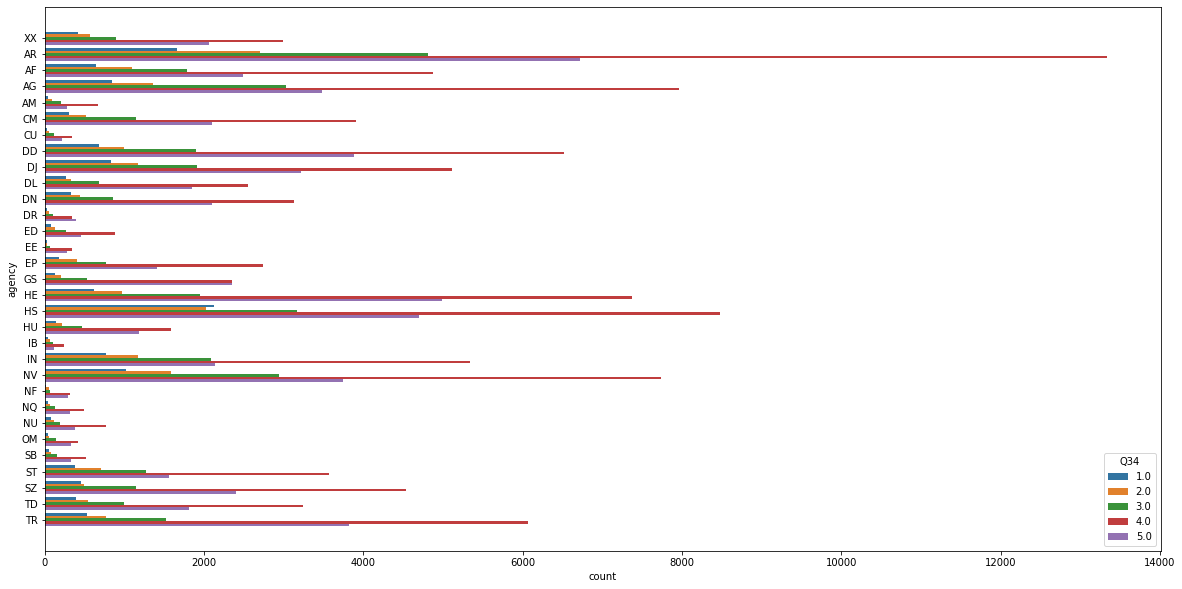

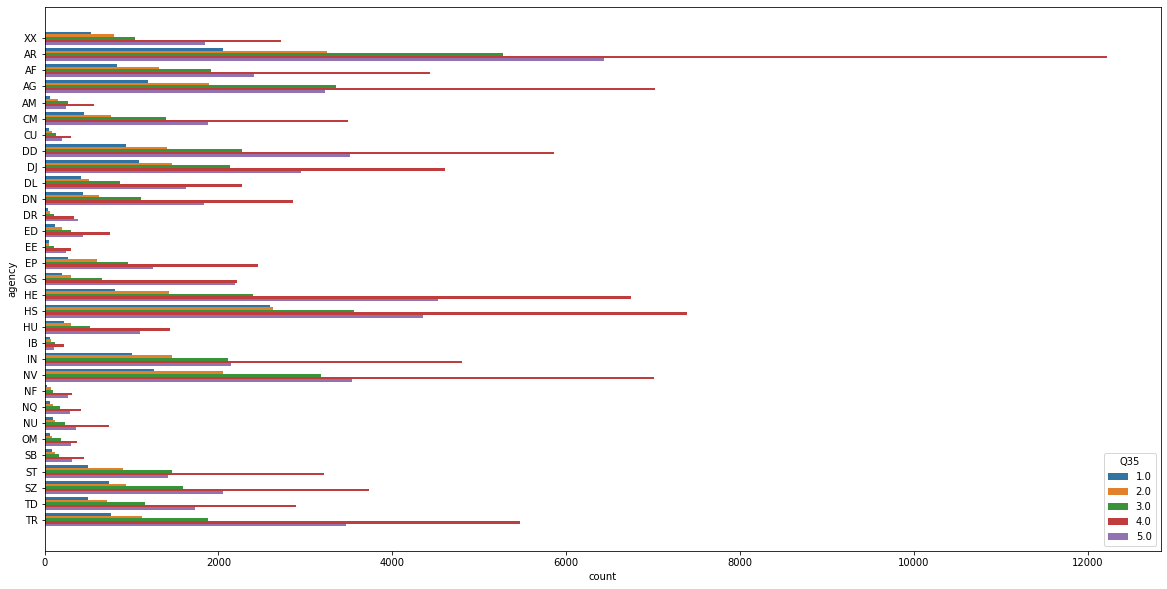

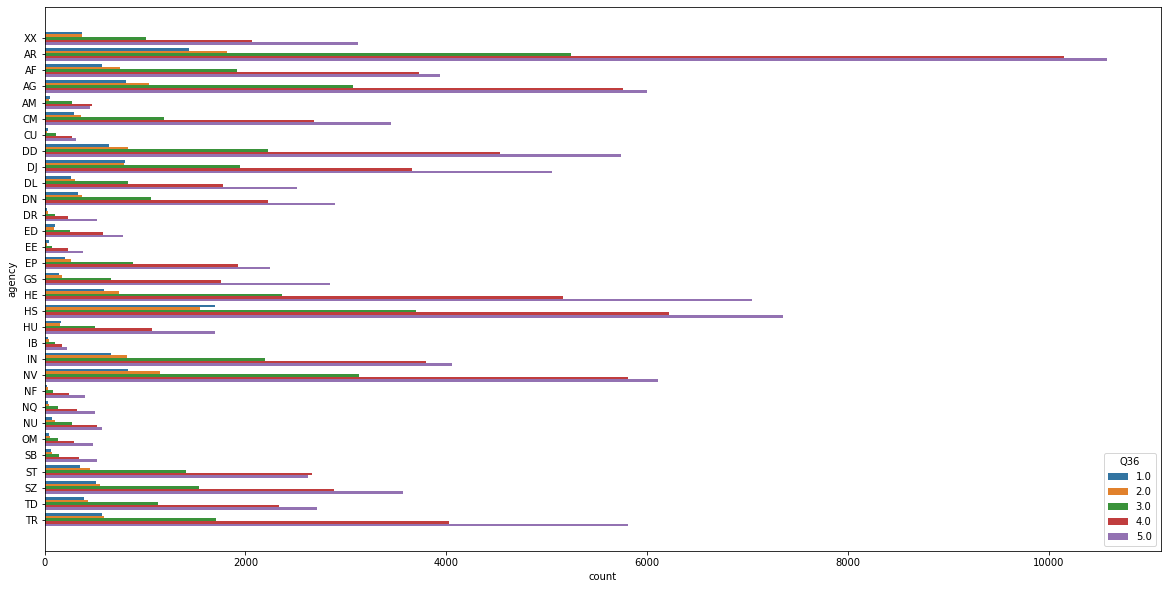

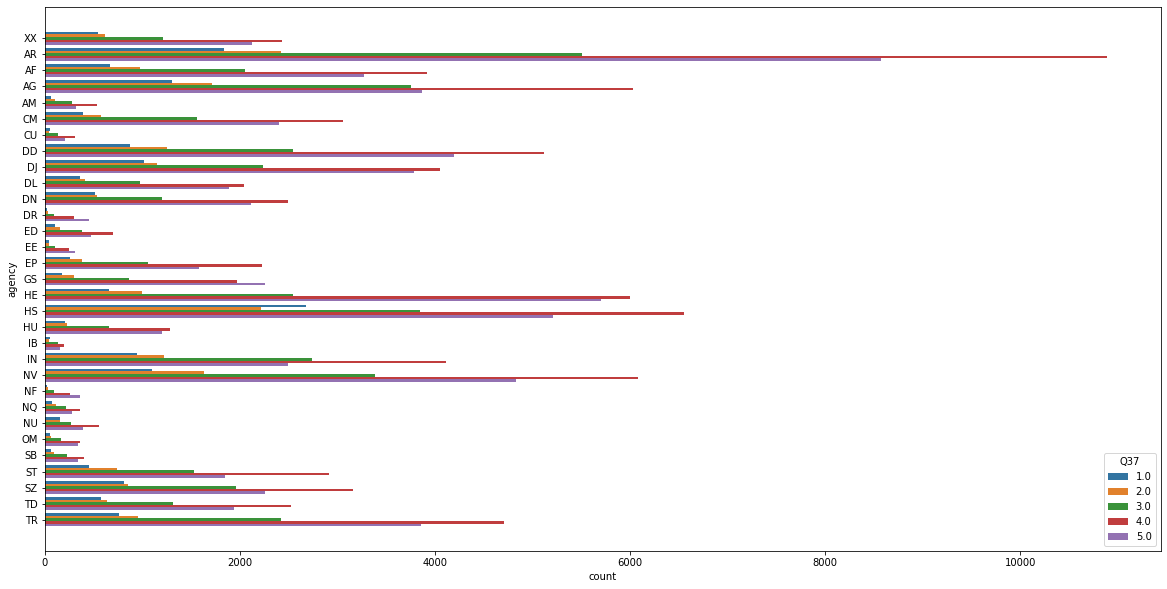

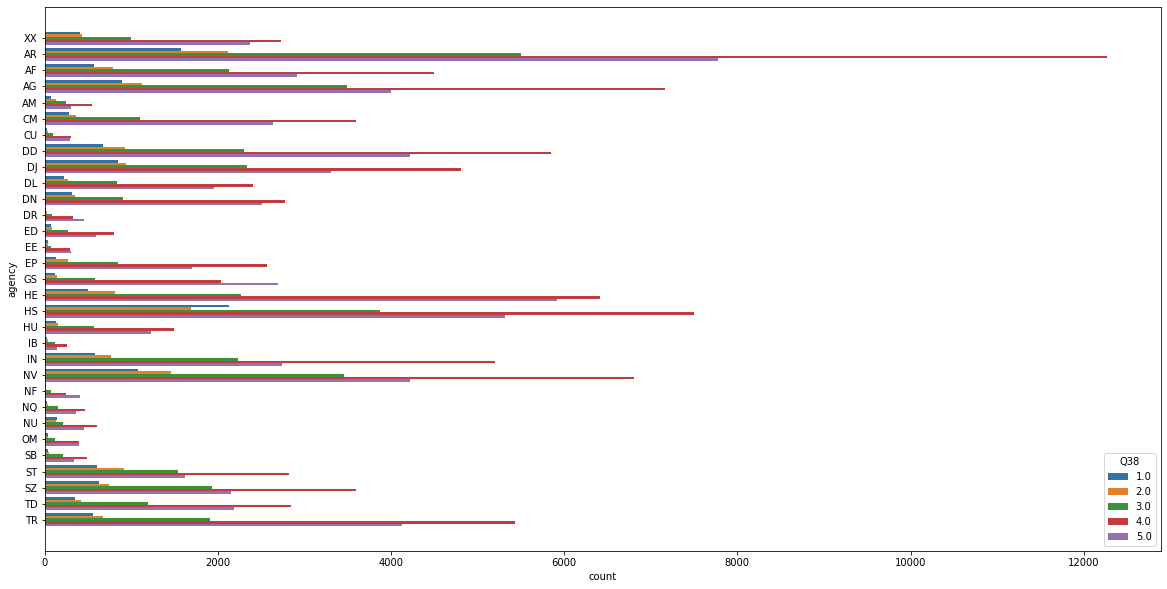

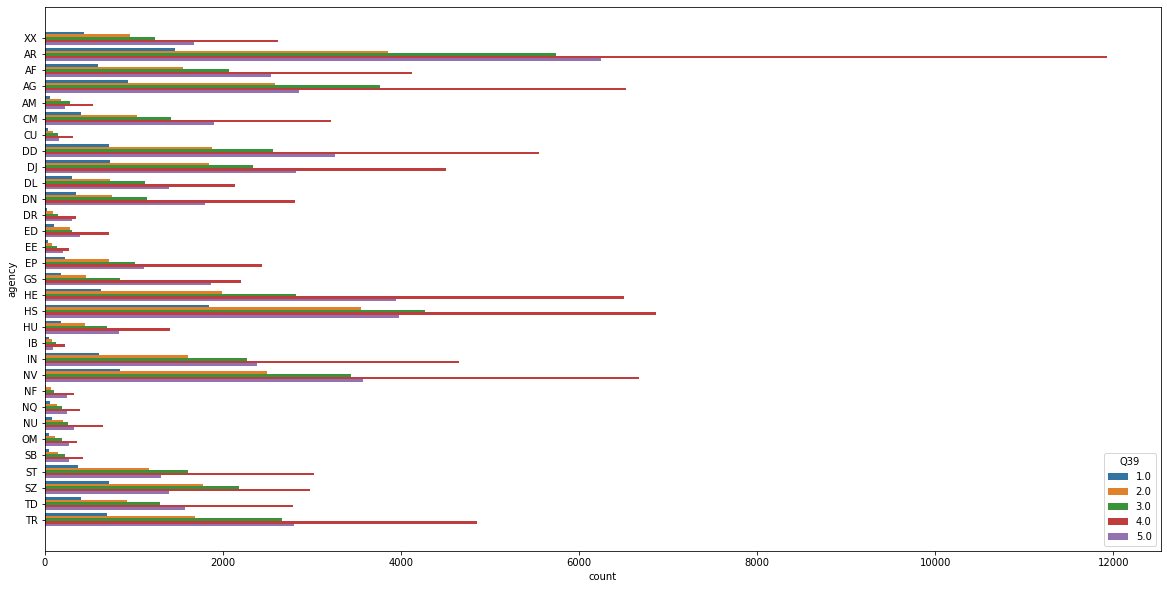

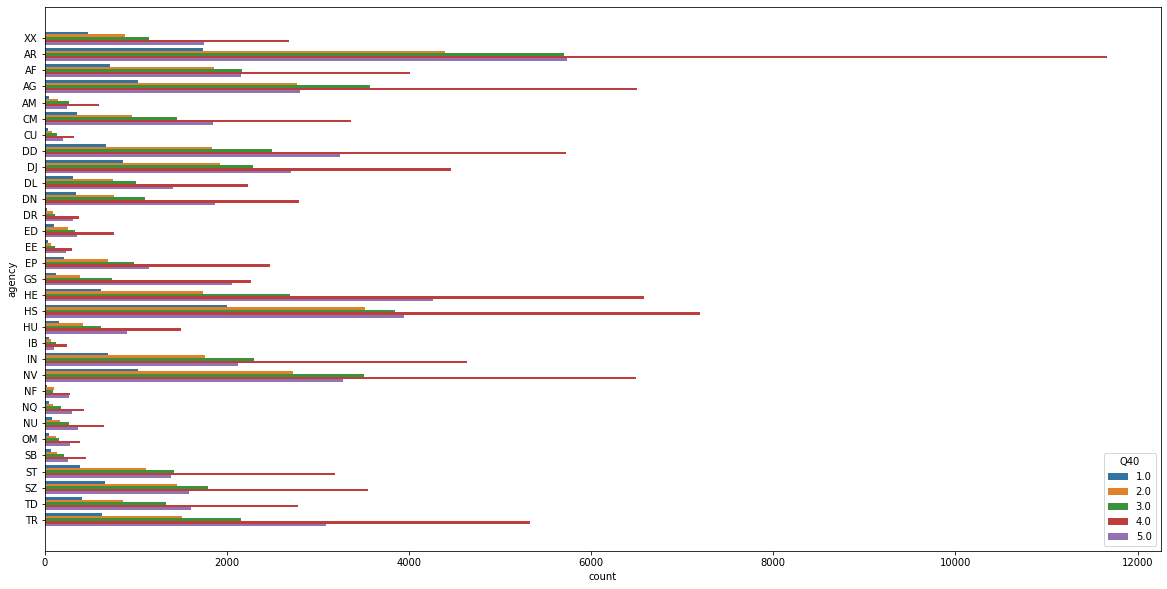

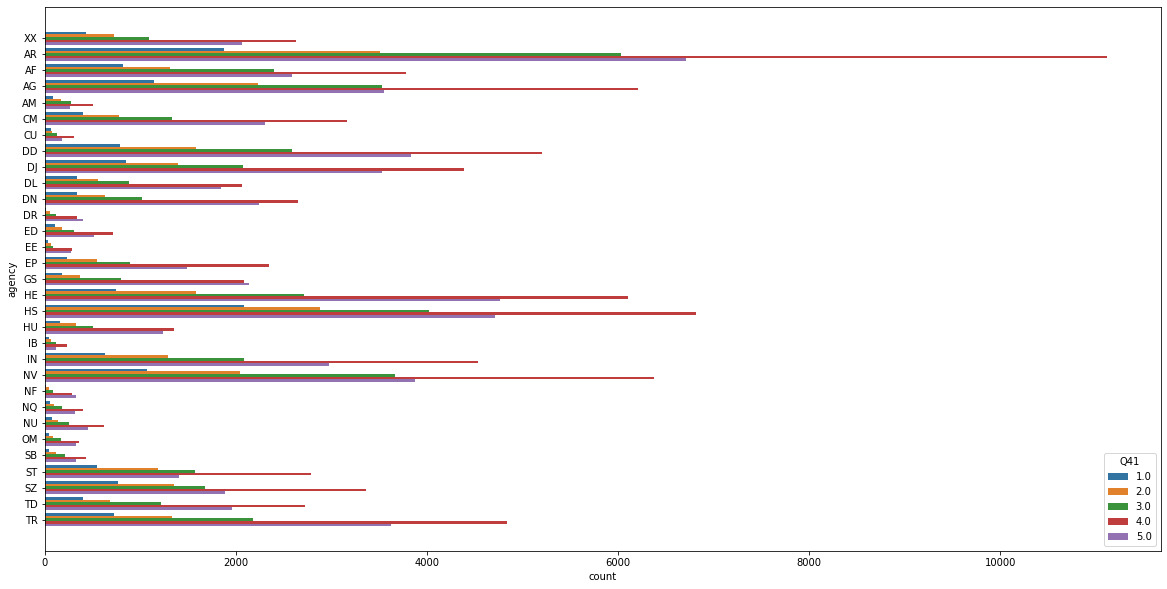

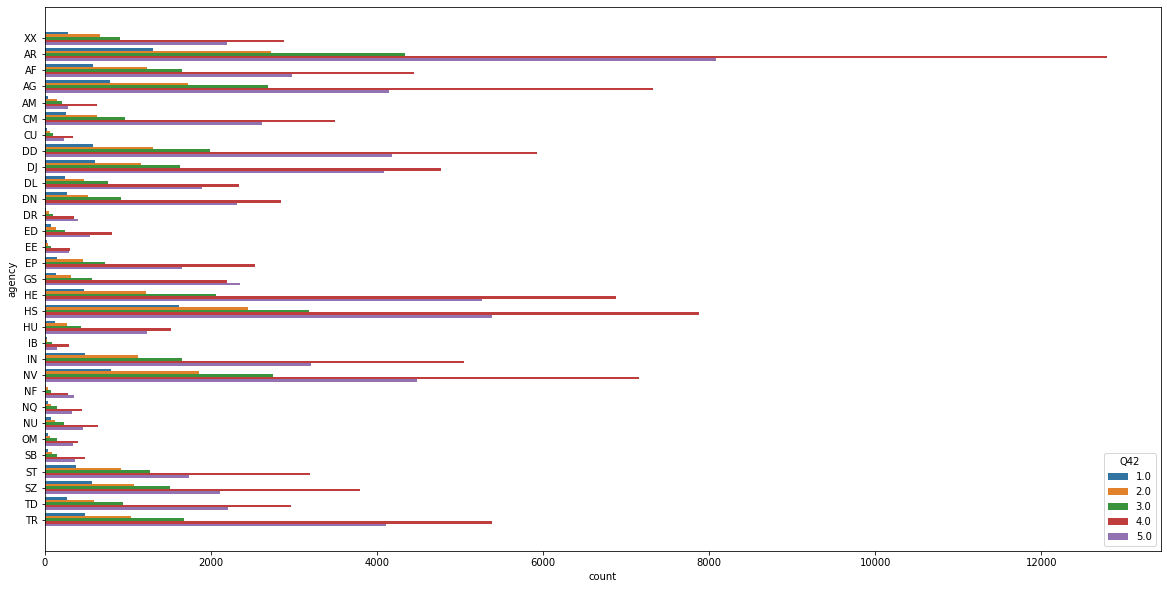

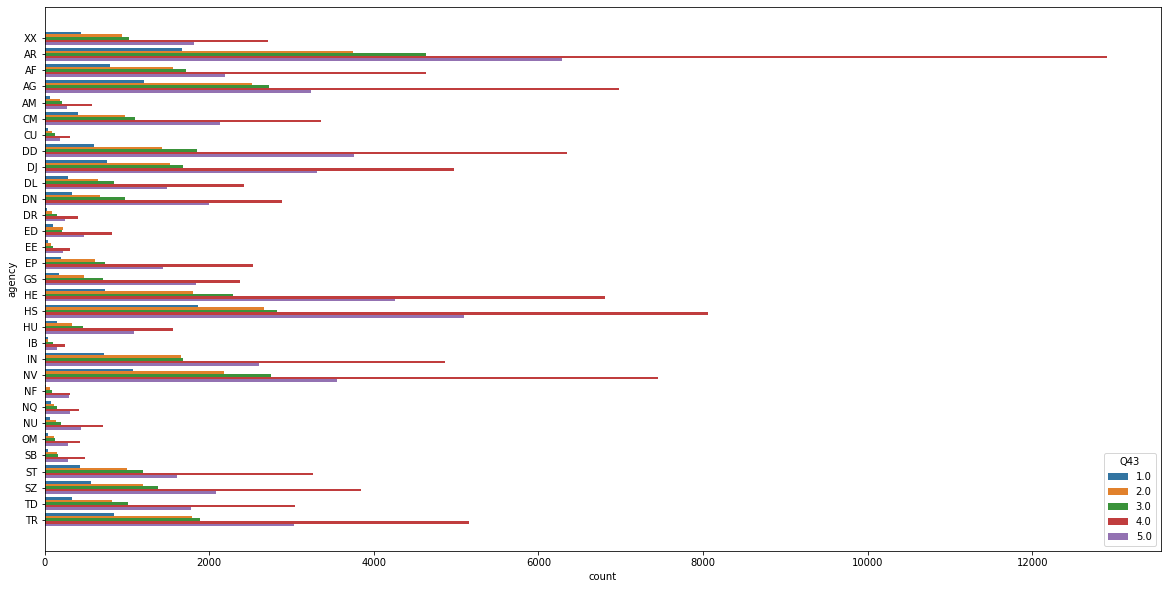

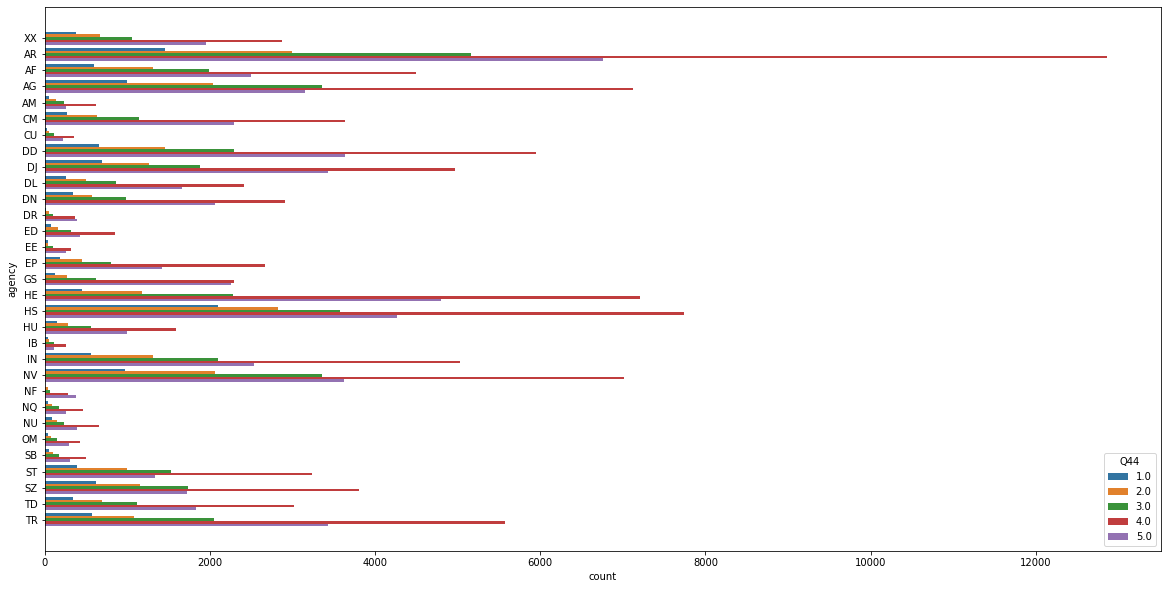

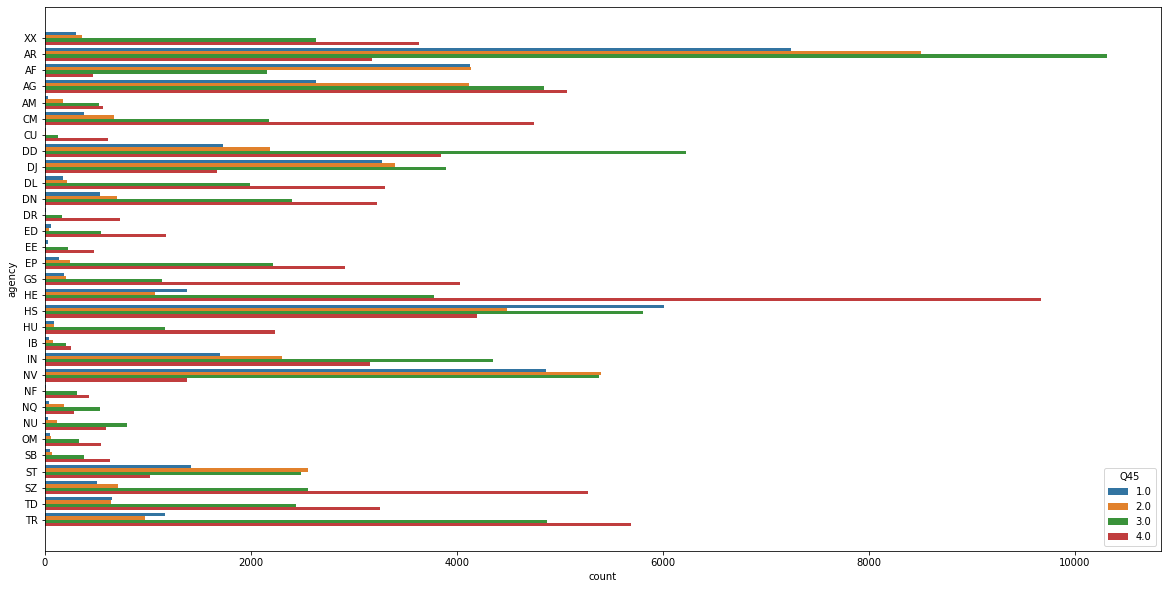

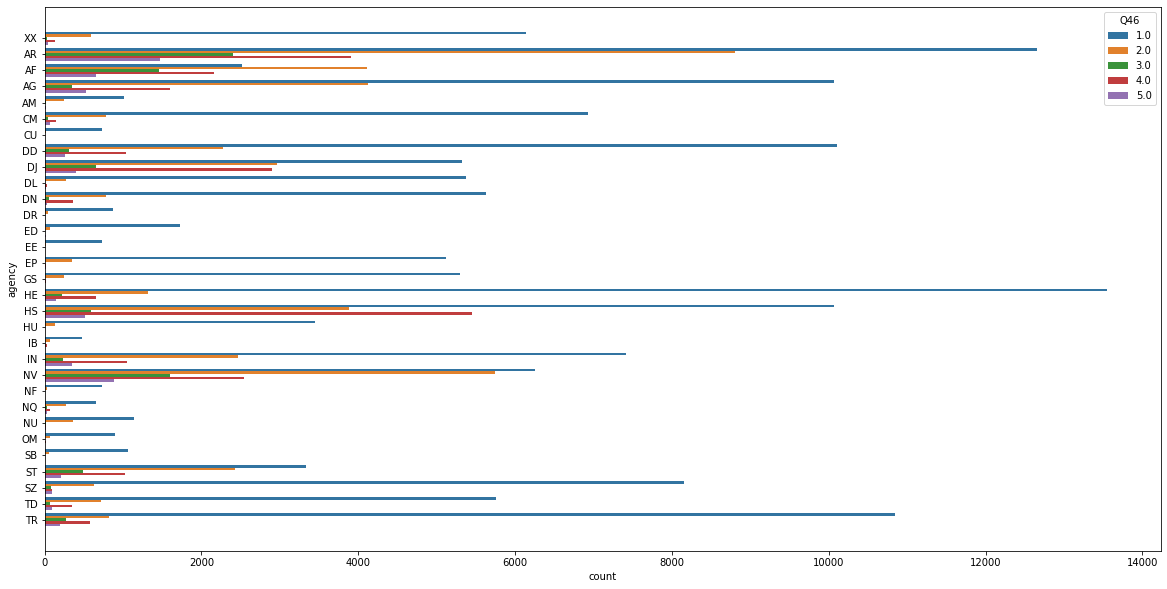

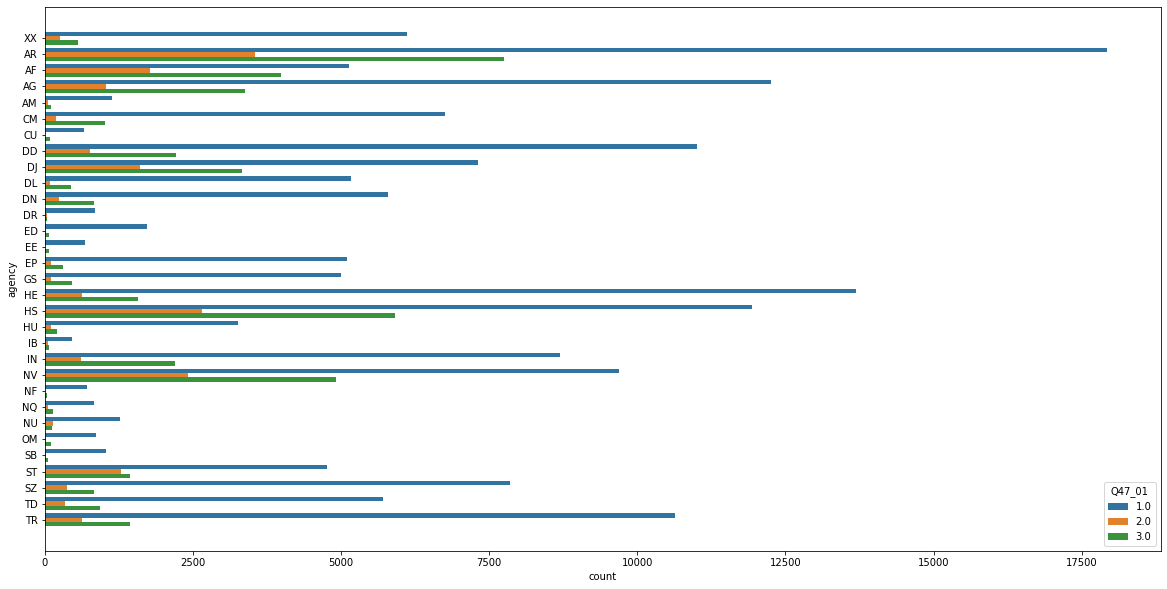

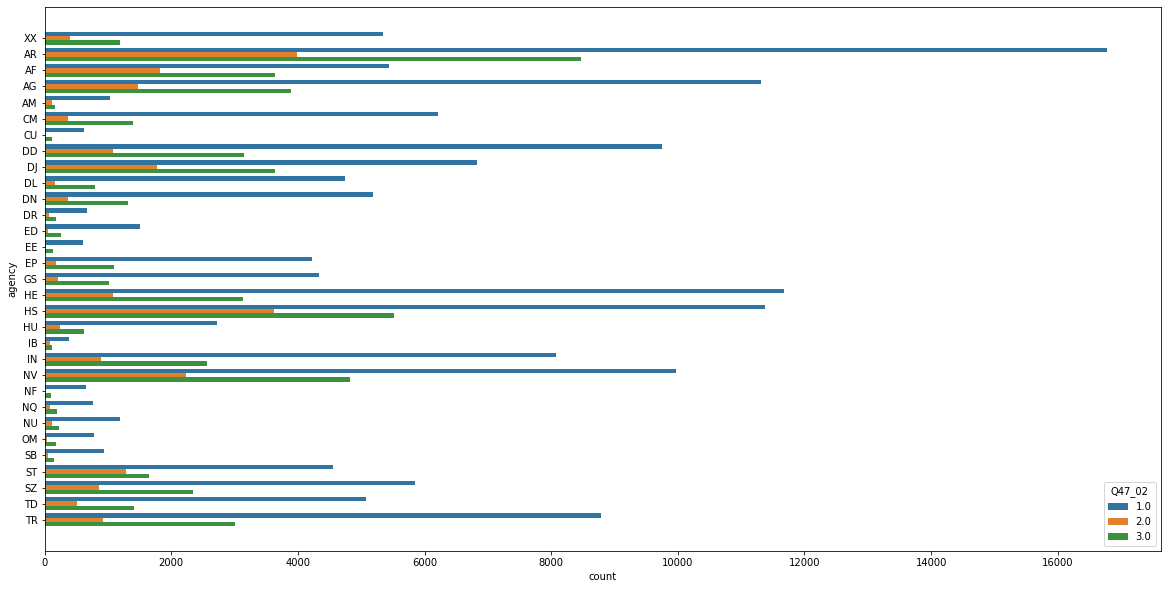

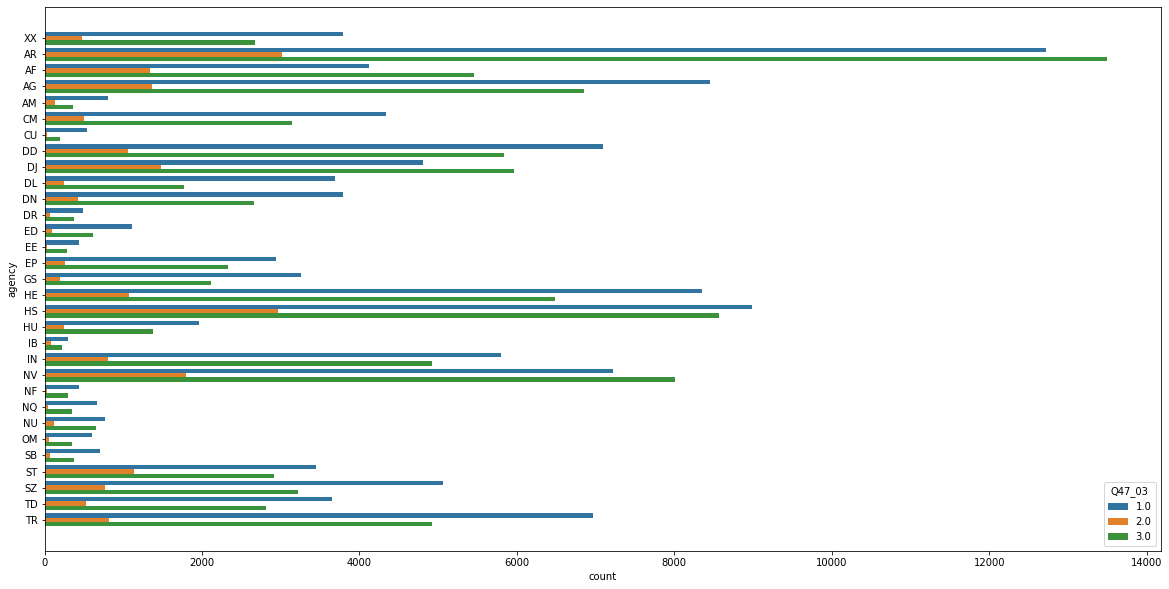

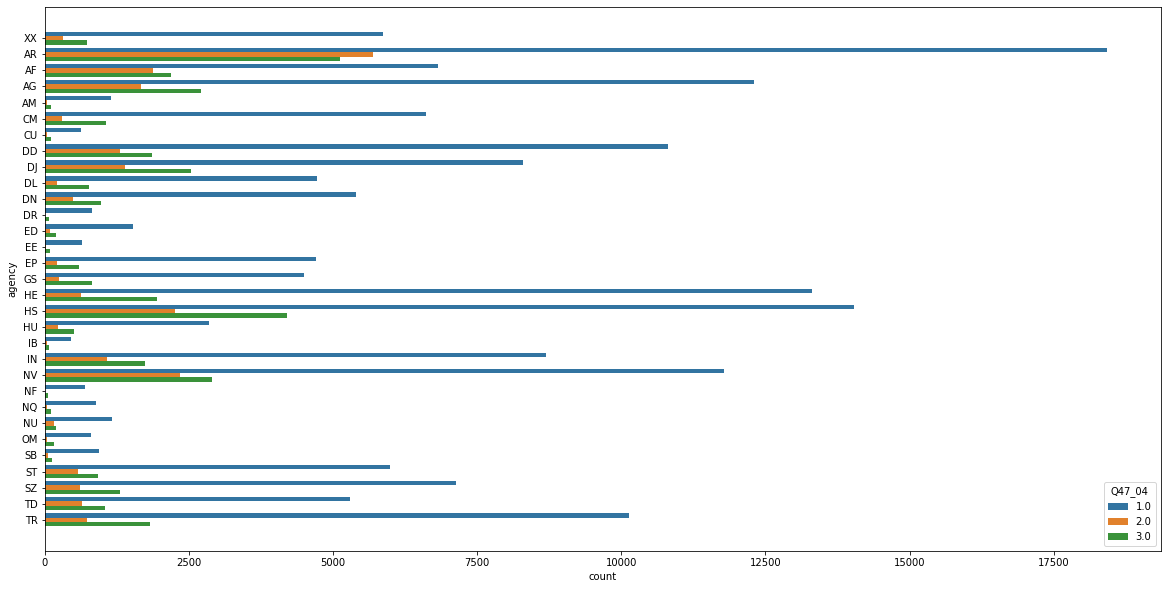

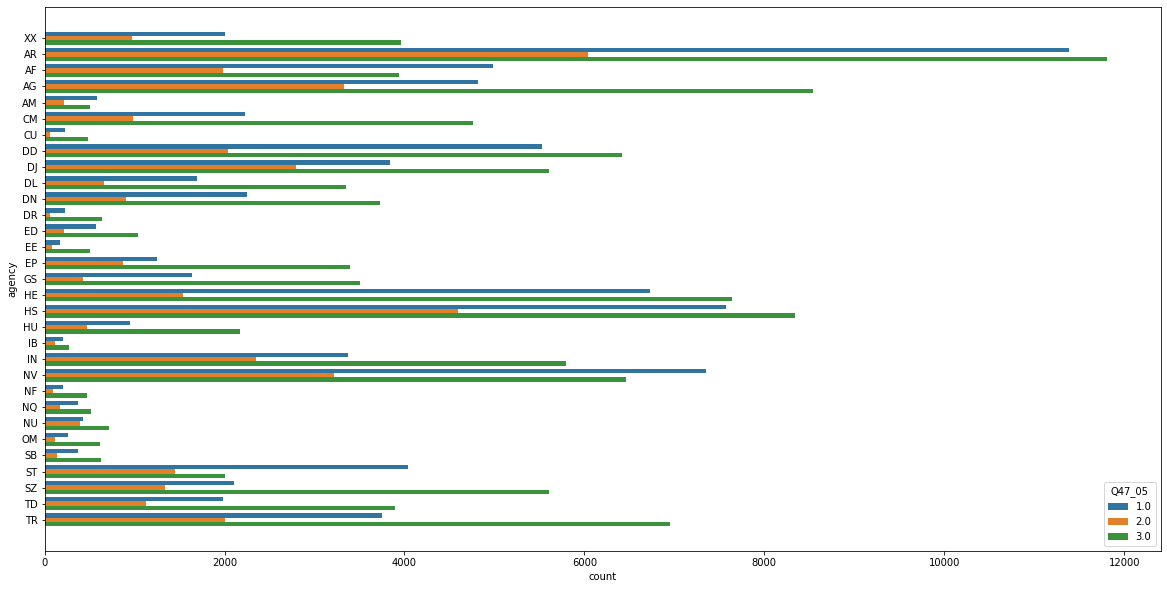

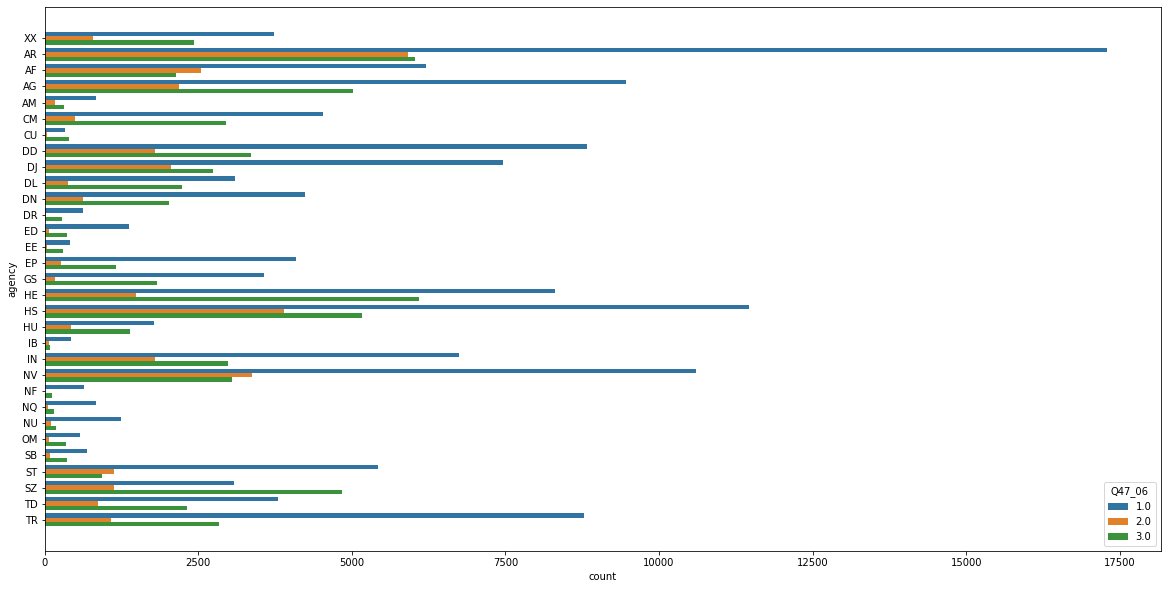

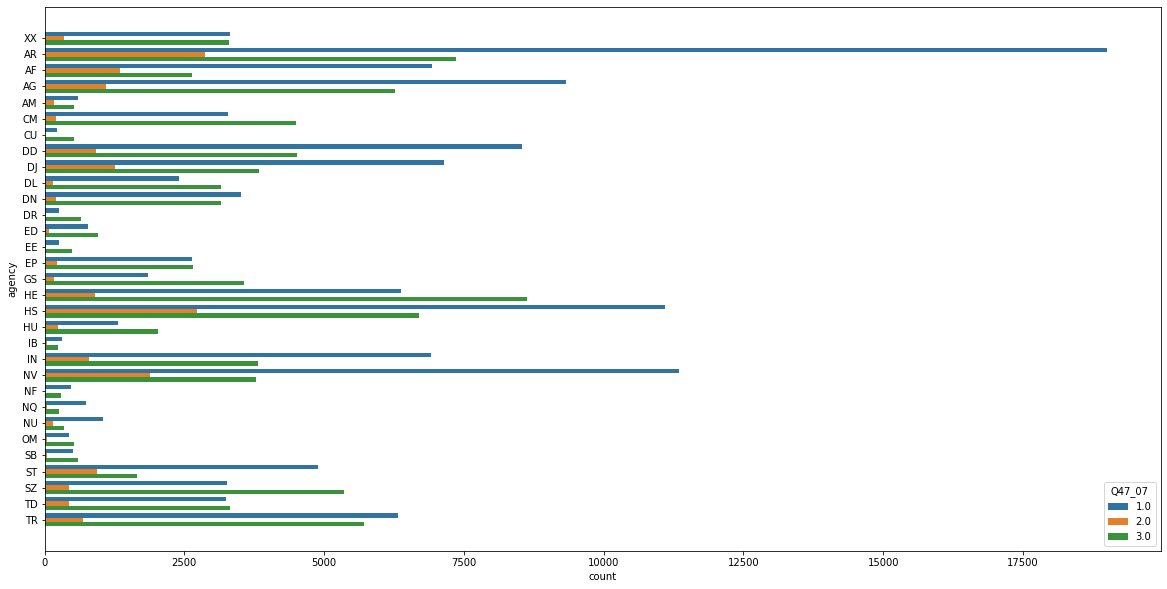

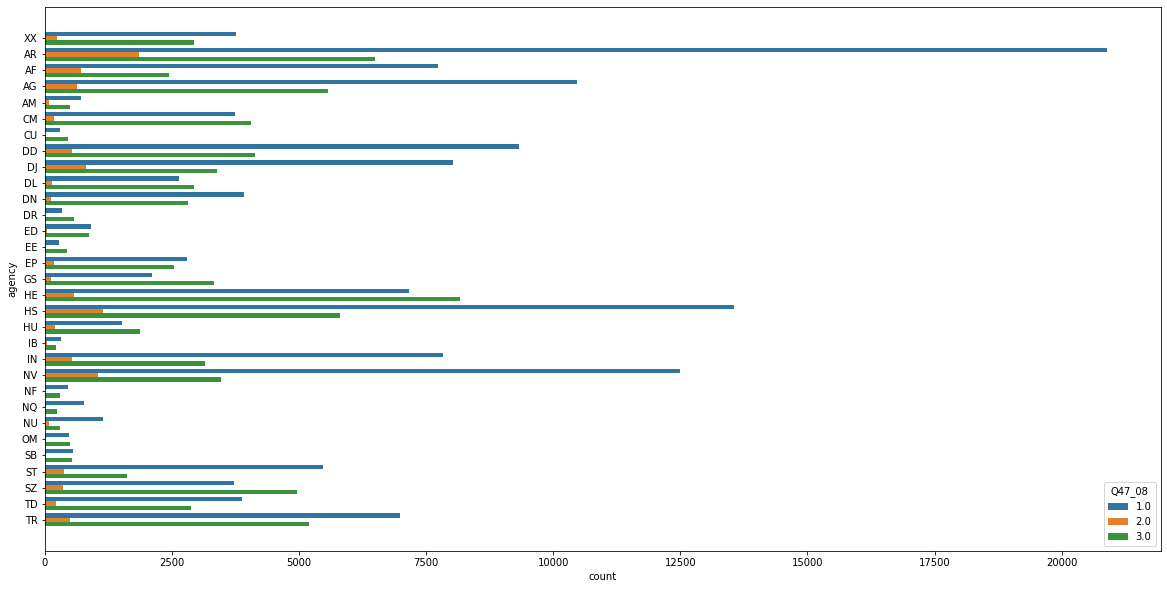

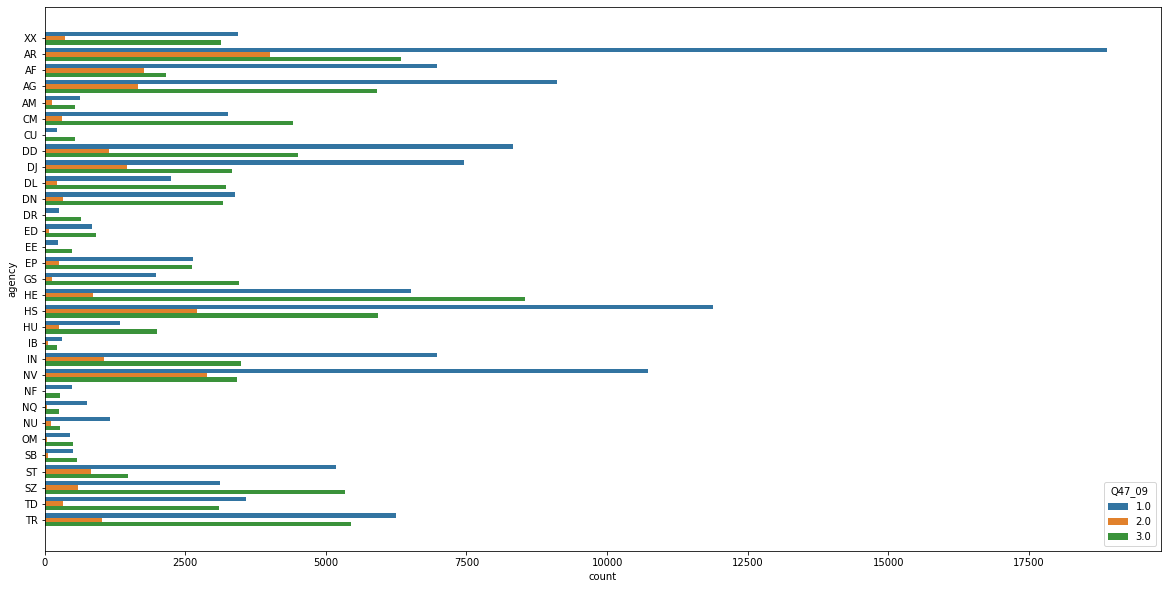

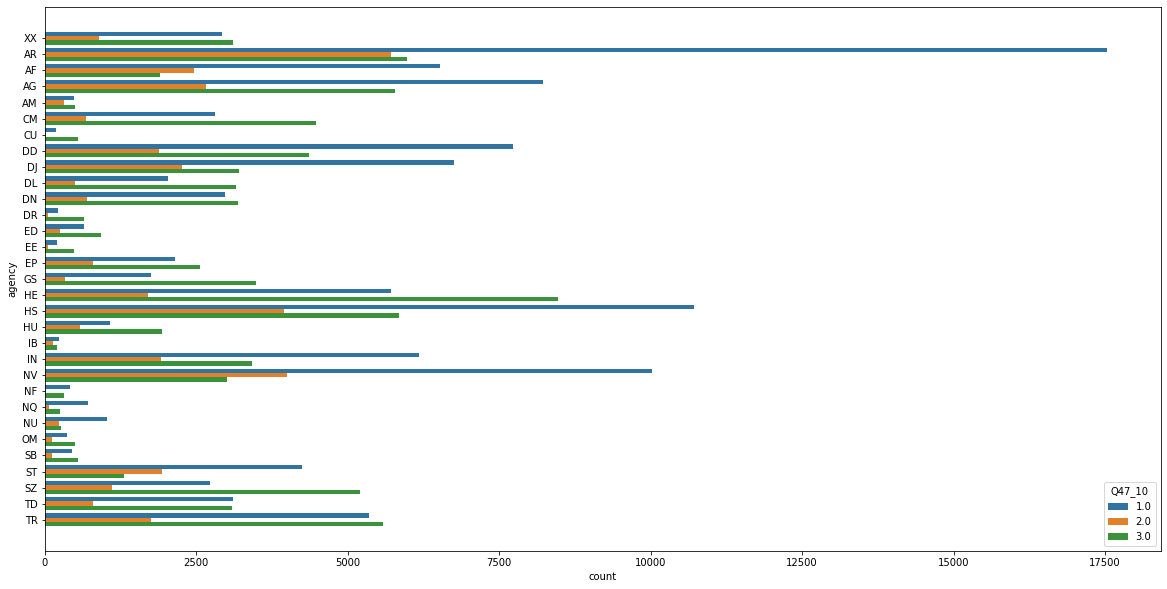

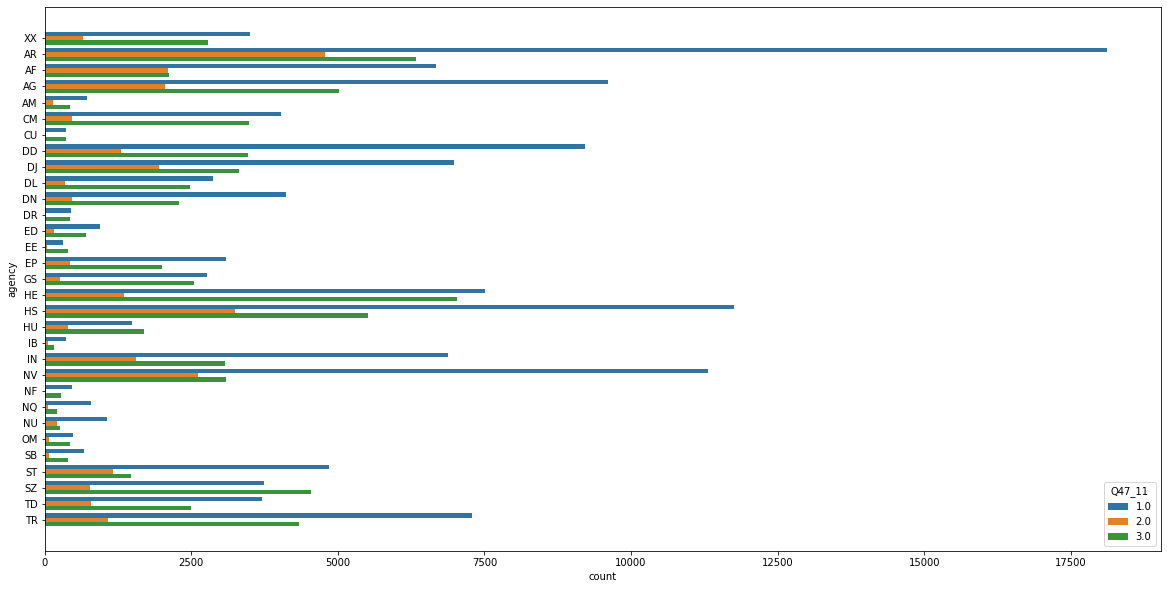

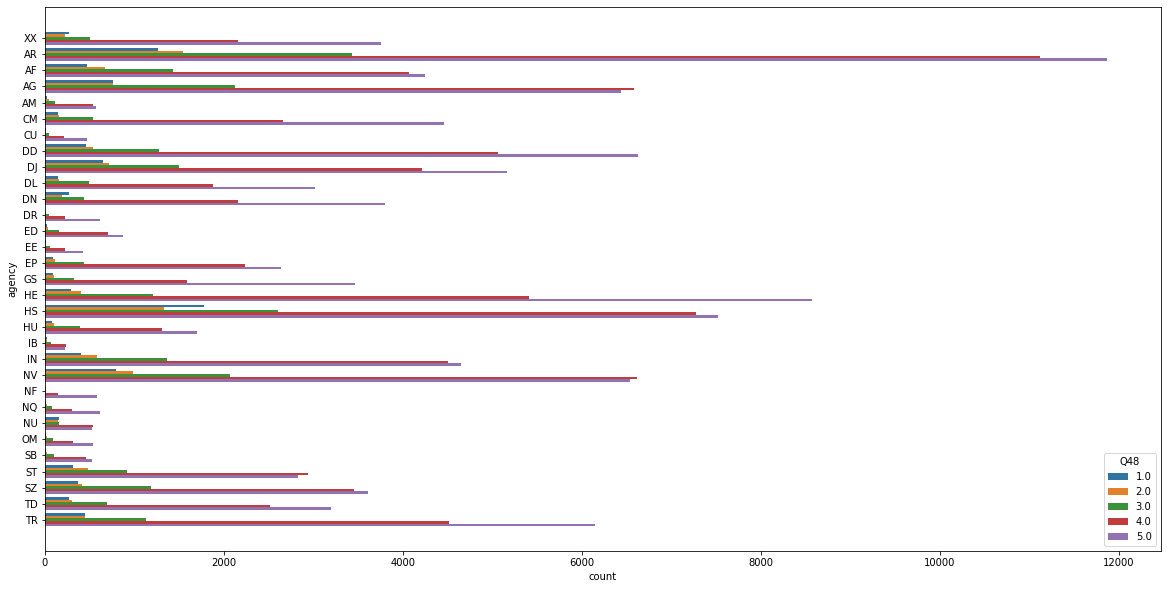

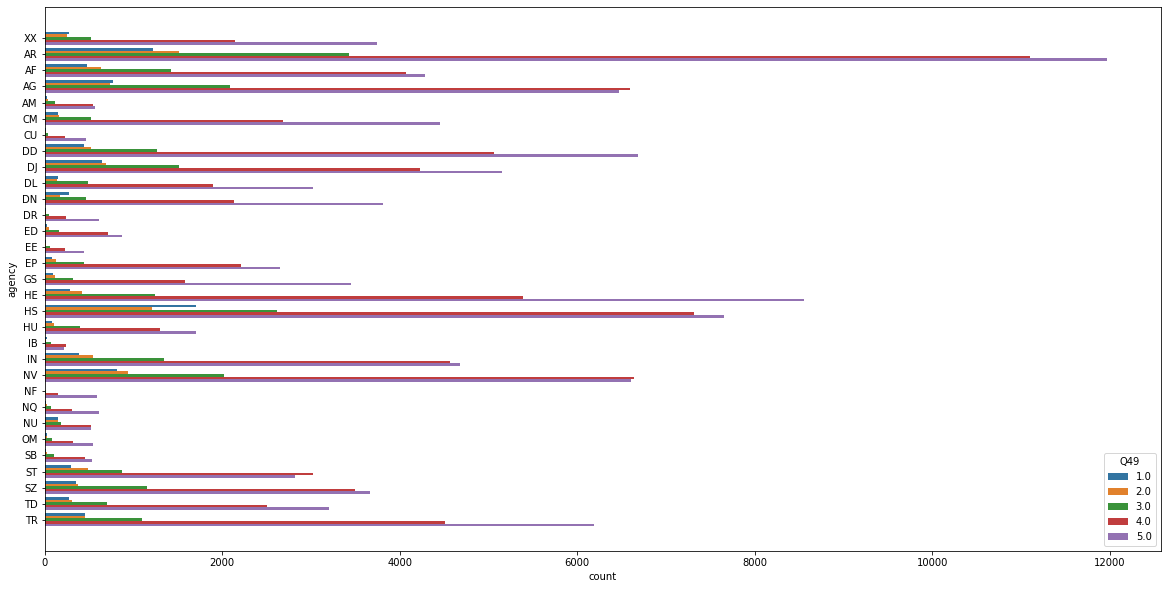

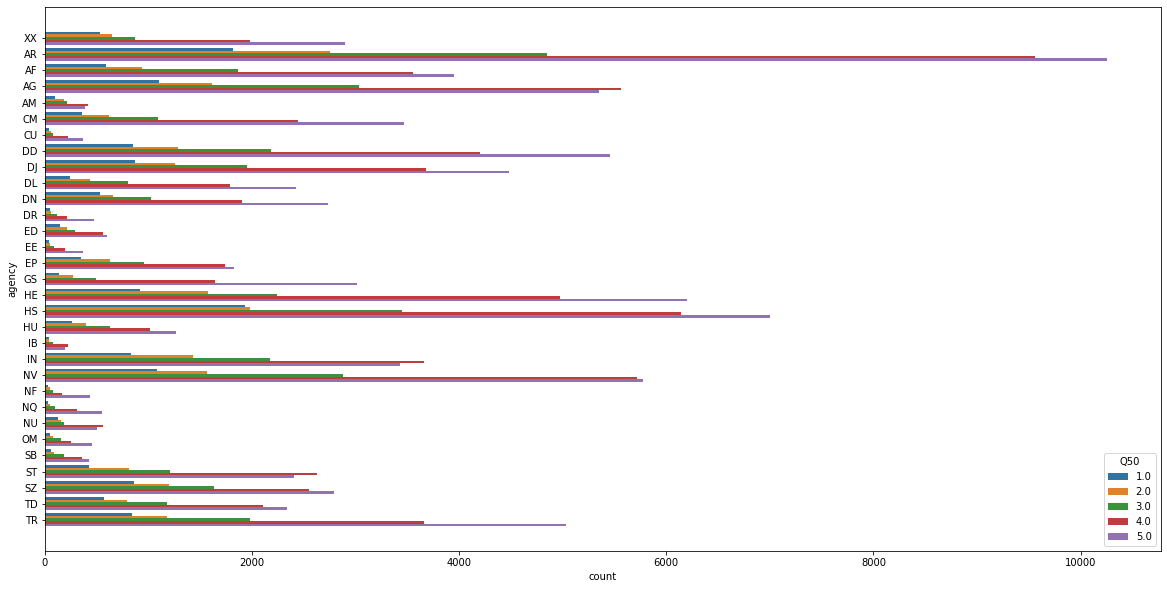

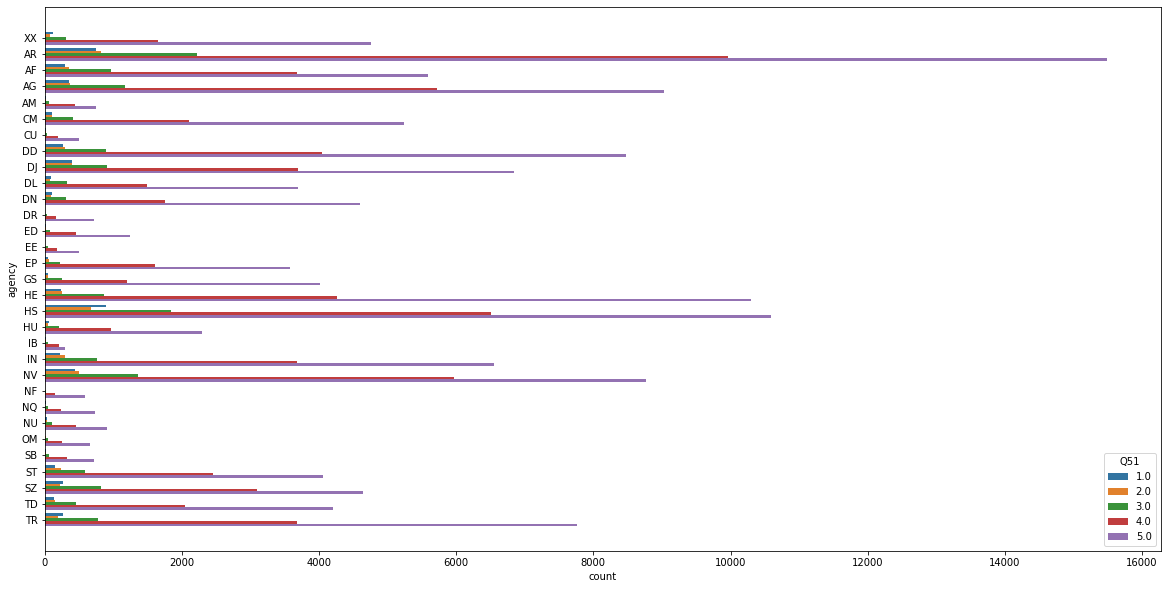

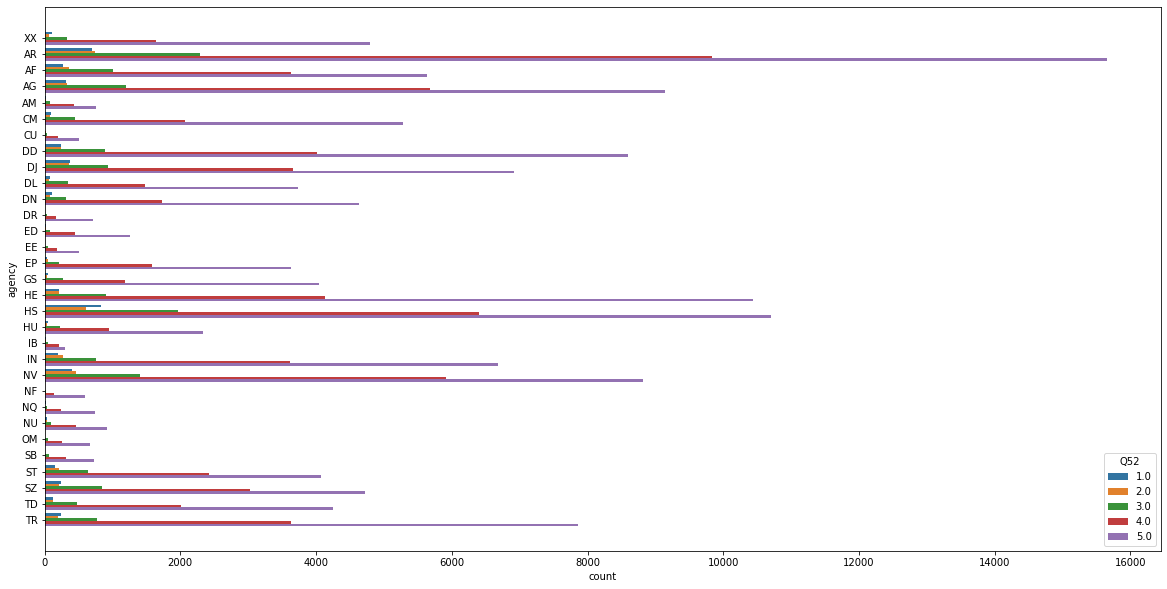

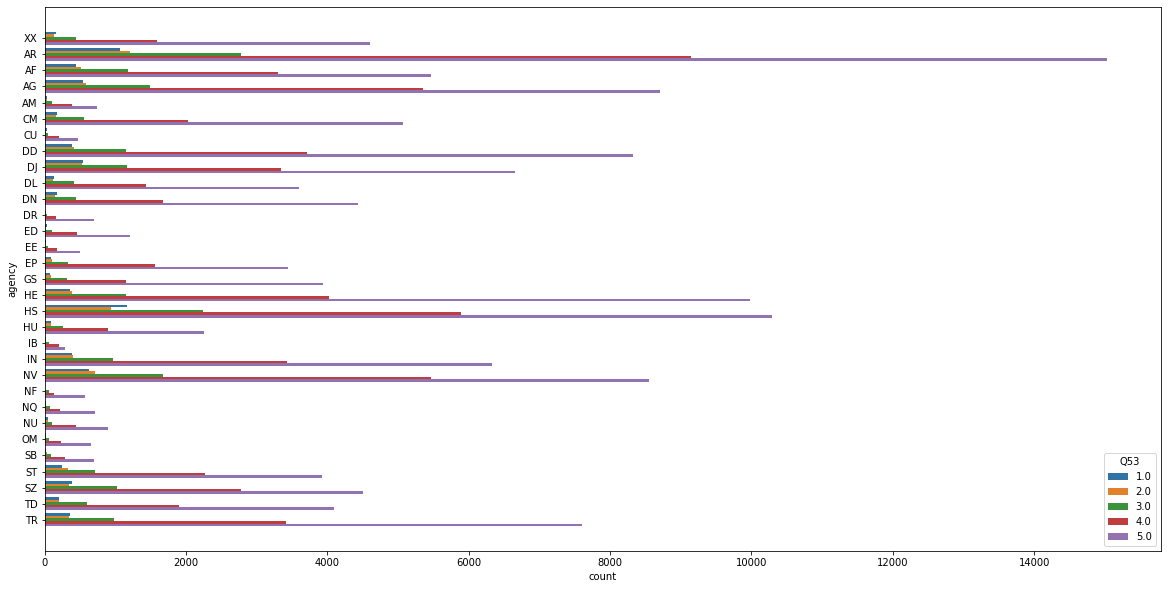

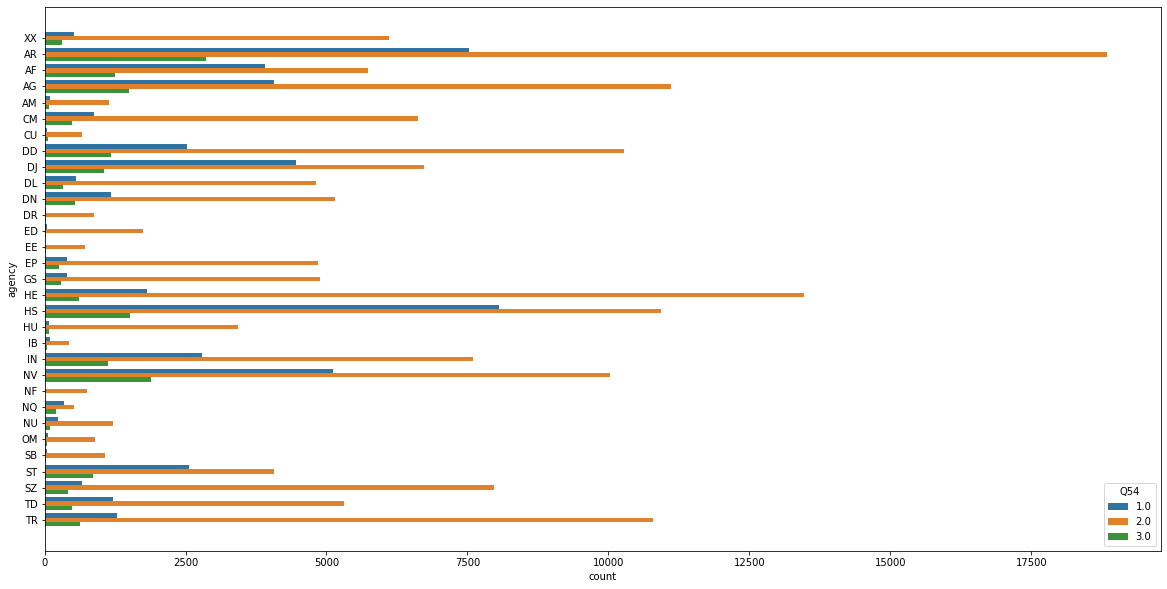

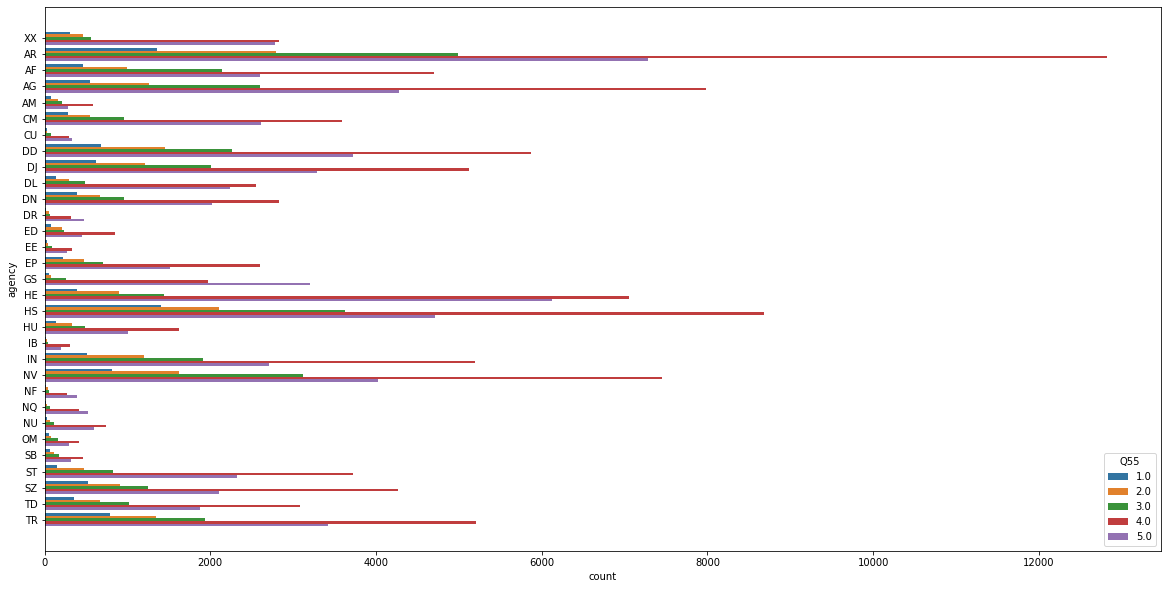

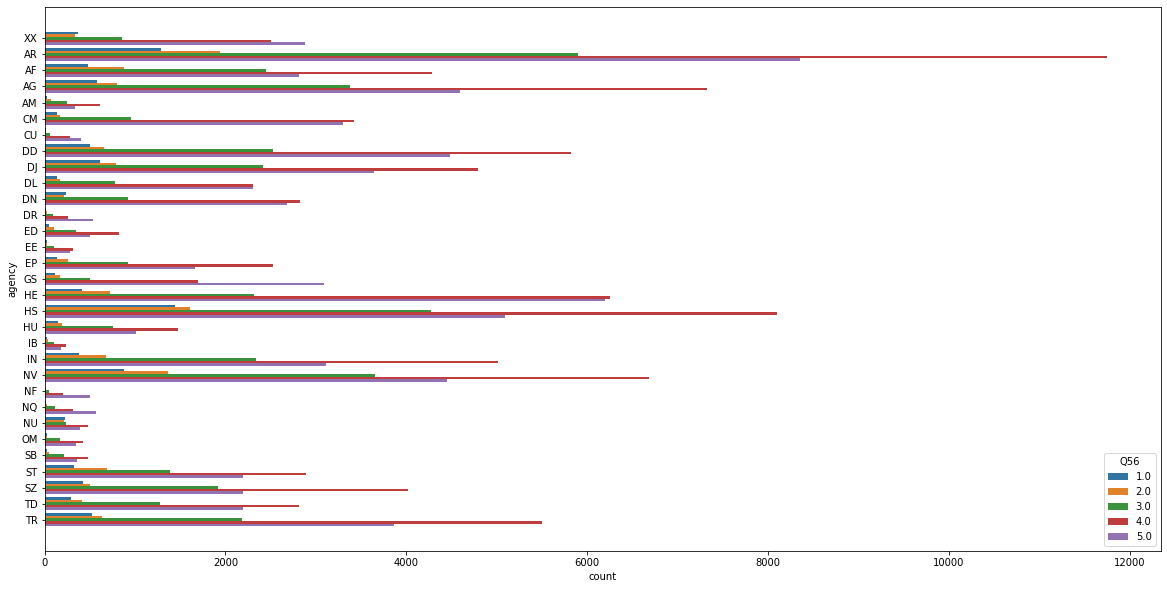

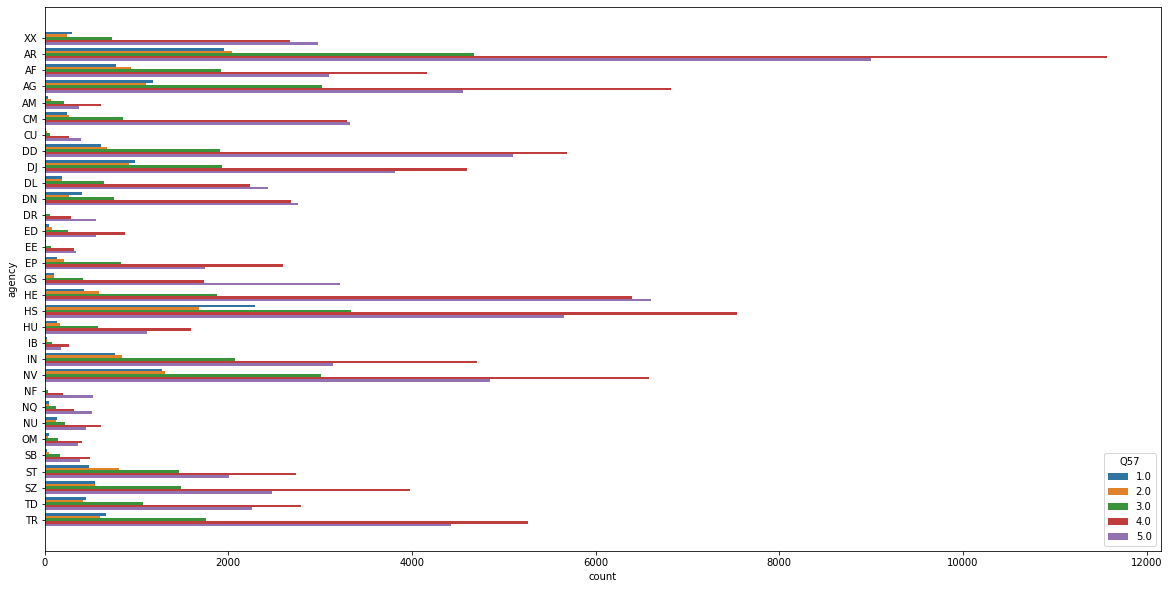

In [ ]:
objects = [column for column, is_type in (df_c.dtypes=="float").items() if is_type]
#objects.remove('agency')
#plt.figure(figsize=(20,10))
for i in objects:
    plt.figure(figsize=(20,10))
    sns.countplot(data=df_ca,y=df_ca['agency'],hue=i)
    plt.plot()